# Telecom Churn Case Stude



## Business problem overview


In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

In [1]:
# Load libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline

In [2]:
telecom_churn_df = pd.read_csv("telecom_churn_data.csv")


In [3]:
telecom_churn_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

In [4]:
# feature type summary
telecom_churn_df.info(verbose=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


## Filter high-value customers

Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)
 

In [5]:
# Total data recharge amount for June and July - number of recharges * average recharge amount

telecom_churn_df['total_data_rech_6'] = telecom_churn_df.total_rech_data_6 * telecom_churn_df.av_rech_amt_data_6
telecom_churn_df['total_data_rech_7'] = telecom_churn_df.total_rech_data_7 * telecom_churn_df.av_rech_amt_data_7

In [6]:
#  total recharge amount for June and July - call recharge amount + data recharge amount


telecom_churn_df['amt_data_6'] = telecom_churn_df[['total_rech_amt_6','total_data_rech_6']].sum(axis=1)
telecom_churn_df['amt_data_7'] = telecom_churn_df[['total_rech_amt_7','total_data_rech_7']].sum(axis=1)

In [7]:
telecom_churn_df['AVG_amt_data_6_7'] = telecom_churn_df[['amt_data_6','amt_data_7']].mean(axis=1)


In [8]:
telecom_churn_df[['total_rech_amt_6','total_rech_amt_7','AVG_amt_data_6_7']].quantile(0.7)


total_rech_amt_6    378.0
total_rech_amt_7    370.0
AVG_amt_data_6_7    478.0
Name: 0.7, dtype: float64

But if we use greater than or equal to, we end up getting a little above 30K records as against to 29.9K records.
So, if we conisder only greater than, then we get 29.9K records.
Therefore we have considered greater than to filter high value customers

In [9]:
df = telecom_churn_df[(telecom_churn_df['AVG_amt_data_6_7']> telecom_churn_df['AVG_amt_data_6_7'].quantile(0.7))]
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 231 entries, mobile_number to AVG_amt_data_6_7
dtypes: float64(184), int64(35), object(12)
memory usage: 53.0+ MB


In [10]:
df.shape

(29953, 231)

## Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

In [11]:
df['churn_flag']  = np.where(((df['total_ic_mou_9'] == 0.00 )| (df ['total_og_mou_9'] == 0.00) )&
         ((df['vol_2g_mb_9'] == 0.00) | (df ['vol_3g_mb_9'] == 0.00 )) , 1 , 0
)

C:\Users\Saroj_Sahu\AppData\Local\Temp\ipykernel_11908\3148096985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['churn_flag']  = np.where(((df['total_ic_mou_9'] == 0.00 )| (df ['total_og_mou_9'] == 0.00) )&


In [12]:
df['churn_flag'].value_counts()

0    26698
1     3255
Name: churn_flag, dtype: int64

In [13]:
df['churn_flag'].value_counts()*100/df.shape[0]

0    89.132975
1    10.867025
Name: churn_flag, dtype: float64

89.1 % were not churn customers whereas 10.8 % were churn customers

Let's drop all features related to churn phase i.e. 9th month



In [14]:
df = df.drop(df.filter(regex='_9|sep', axis = 1).columns, axis=1)


In [15]:
pd.set_option('display.max_rows', None)

null_percentage = df.isnull().sum() * 100 / df.shape[0]

# Sort the null_percentage Series in descending order
null_percentage_sorted = null_percentage.sort_values(ascending=False)


In [16]:
null_percentage_sorted

arpu_3g_8                   46.799987
night_pck_user_8            46.799987
date_of_last_rech_data_8    46.799987
max_rech_data_8             46.799987
count_rech_2g_8             46.799987
count_rech_3g_8             46.799987
av_rech_amt_data_8          46.799987
total_rech_data_8           46.799987
fb_user_8                   46.799987
arpu_2g_8                   46.799987
night_pck_user_6            44.112443
total_rech_data_6           44.112443
av_rech_amt_data_6          44.112443
date_of_last_rech_data_6    44.112443
count_rech_3g_6             44.112443
arpu_2g_6                   44.112443
count_rech_2g_6             44.112443
arpu_3g_6                   44.112443
total_data_rech_6           44.112443
max_rech_data_6             44.112443
fb_user_6                   44.112443
fb_user_7                   43.117551
date_of_last_rech_data_7    43.117551
total_rech_data_7           43.117551
arpu_2g_7                   43.117551
count_rech_2g_7             43.117551
count_rech_3

# Handle Missing Values

## 1. Imputing with Zero for recharge amounts

In [17]:
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8','arpu_2g_8','arpu_3g_6','arpu_2g_6', 'arpu_2g_7','arpu_3g_7'
                 ]

df[recharge_cols].describe(include='all')

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       16740.000000       17038.000000       15935.000000   
mean            2.987515           3.262648           3.050769   
std             3.228484           3.497957           3.540332   
min             1.000000           1.000000           1.000000   
25%             1.000000           1.000000           1.000000   
50%             2.000000           2.000000           2.000000   
75%             4.000000           4.000000           4.000000   
max            61.000000          54.000000          60.000000   

       count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  \
count     16740.000000     17038.000000     15935.000000     16740.000000   
mean          2.222162         2.458974         2.273110         0.765352   
std           3.006502         3.236767         3.113894         1.478287   
min           0.000000         0.000000         0.000000         0.000000   
25%           0.000000         0.000000         0.000000         0.000000   
50%           1.000000         1.000000         1.000000         0.000000   
75%           3.000000         3.000000         3.000000         1.000000   
max          42.000000        48.000000        44.000000        29.000000   

       count_rech_3g_7  count_rech_3g_8  max_rech_data_6  max_rech_data_7  \
count     17038.000000     15935.000000     16740.000000     17038.000000   
mean          0.803674         0.777659       139.804002       140.444712   
std           1.618485         1.668363       118.892926       120.295284   
min           0.000000         0.000000         1.000000         1.000000   
25%           0.000000         0.000000        25.000000        25.000000   
50%           0.000000         0.000000       152.000000       152.000000   
75%           1.000000         1.000000       198.000000       198.000000   
max          35.000000        45.000000      1555.000000      1555.000000   

       max_rech_data_8  av_rech_amt_data_6  av_rech_amt_data_7  \
count     15935.000000        16740.000000        17038.000000   
mean        136.353373          234.003257          245.977234   
std         119.571138          218.468385          221.778856   
min           1.000000            1.000000            1.000000   
25%          25.000000          123.000000          138.000000   
50%         152.000000          185.000000          198.000000   
75%         198.000000          296.000000          304.000000   
max        1555.000000         7546.000000         4365.000000   

       av_rech_amt_data_8     arpu_2g_8     arpu_3g_6     arpu_2g_6  \
count        15935.000000  15935.000000  16740.000000  16740.000000   
mean           229.716717    109.877727    120.055618    113.672310   
std            217.379834    195.417759    226.164119    201.863076   
min              1.000000    -24.430000    -30.280000    -15.320000   
25%            100.000000      0.000000      0.000000      0.010000   
50%            179.000000     20.000000     15.605000     27.085000   
75%            274.000000    157.525000    178.345000    168.745000   
max           4061.000000   3467.170000   6362.280000   6433.760000   

          arpu_2g_7     arpu_3g_7  
count  17038.000000  17038.000000  
mean     113.907625    120.810794  
std      206.150982    229.671975  
min      -15.480000    -26.040000  
25%        0.000000      0.000000  
50%       24.065000     13.000000  
75%      167.670000    180.522500  
max     4809.360000   4980.900000

In [18]:
df[df['arpu_3g_8'].isna()][['date_of_last_rech_data_8','total_rech_data_8','max_rech_data_8','count_rech_2g_8', 
                            'count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_2g_8',
                            'night_pck_user_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8',
                            'fb_user_8'
                           ]].head()

date_of_last_rech_data_8  total_rech_data_8  max_rech_data_8  \
7                       NaN                NaN              NaN   
21                      NaN                NaN              NaN   
38                      NaN                NaN              NaN   
41                      NaN                NaN              NaN   
48                      NaN                NaN              NaN   

    count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8  vol_2g_mb_8  \
7               NaN              NaN                 NaN          0.0   
21              NaN              NaN                 NaN          0.0   
38              NaN              NaN                 NaN          0.0   
41              NaN              NaN                 NaN          0.0   
48              NaN              NaN                 NaN          0.0   

    vol_3g_mb_8  arpu_2g_8  night_pck_user_8  monthly_2g_8  sachet_2g_8  \
7           0.0        NaN               NaN             0            0   
21          0.0        NaN               NaN             0            0   
38          0.0        NaN               NaN             0            0   
41          0.0        NaN               NaN             0            0   
48          0.0        NaN               NaN             0            0   

    monthly_3g_8  sachet_3g_8  fb_user_8  
7              0            0        NaN  
21             0            0        NaN  
38             0            0        NaN  
41             0            0        NaN  
48             0            0        NaN

The above table signifies there is no recharge happened for a sample data. so for all these recharge amount where value is null we can impute with 0


In [19]:
df['arpu_3g_8'].fillna(0,inplace=True)


In [20]:
df[recharge_cols] = df[recharge_cols].apply(lambda x: x.fillna(0))


In [21]:
# summary
print("\n\nSummary statistics\n")
print(df[recharge_cols].describe(include='all'))



Summary statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       29953.000000       29953.000000       29953.000000   
mean            1.669649           1.855874           1.623009   
std             2.832934           3.093650           2.997534   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             1.000000           1.000000           1.000000   
75%             2.000000           2.000000           2.000000   
max            61.000000          54.000000          60.000000   

       count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  \
count     29953.000000     29953.000000     29953.000000     29953.000000   
mean          1.241912         1.398725         1.209295         0.427737   
std           2.503797         2.728053         2.538663         1.168637   
min           0.000000         0.000000         0.000000         0.000000  

In [22]:
# Now Lets see the null % graph

pd.set_option('display.max_rows', None)

null_percentage = df.isnull().sum() * 100 / df.shape[0]

# Sort the null_percentage Series in descending order
null_percentage_sorted = null_percentage.sort_values(ascending=False)

null_percentage_sorted

date_of_last_rech_data_8    46.799987
fb_user_8                   46.799987
night_pck_user_8            46.799987
total_data_rech_6           44.112443
date_of_last_rech_data_6    44.112443
fb_user_6                   44.112443
night_pck_user_6            44.112443
date_of_last_rech_data_7    43.117551
night_pck_user_7            43.117551
total_data_rech_7           43.117551
fb_user_7                   43.117551
std_ic_t2t_mou_8             3.912797
loc_ic_t2m_mou_8             3.912797
loc_og_t2c_mou_8             3.912797
loc_ic_mou_8                 3.912797
loc_og_mou_8                 3.912797
loc_ic_t2f_mou_8             3.912797
std_og_t2t_mou_8             3.912797
std_ic_t2o_mou_8             3.912797
std_og_t2m_mou_8             3.912797
loc_ic_t2t_mou_8             3.912797
std_og_t2f_mou_8             3.912797
std_ic_t2m_mou_8             3.912797
og_others_8                  3.912797
std_og_t2c_mou_8             3.912797
spl_og_mou_8                 3.912797
std_og_mou_8

In [23]:
cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
            ]

In [24]:
df[cat_cols].value_counts()

night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  fb_user_7  fb_user_8
0.0               0.0               0.0               1.0        1.0        1.0          10812
                                                      0.0        0.0        0.0            398
1.0               1.0               1.0               1.0        1.0        1.0            124
0.0               0.0               0.0               0.0        1.0        1.0             93
1.0               0.0               0.0               1.0        1.0        1.0             91
0.0               0.0               0.0               1.0        1.0        0.0             84
                                                                 0.0        0.0             58
                                                      0.0        0.0        1.0             57
                  1.0               0.0               1.0        1.0        1.0             54
                  0.0               1.0               1.0  

In [25]:
# replace missing values with '-1' in categorical columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(-1))

In [26]:
# Now Lets see the null % graph

pd.set_option('display.max_rows', None)

null_percentage = df.isnull().sum() * 100 / df.shape[0]

# Sort the null_percentage Series in descending order
null_percentage_sorted = null_percentage.sort_values(ascending=False)

null_percentage_sorted

date_of_last_rech_data_8    46.799987
total_data_rech_6           44.112443
date_of_last_rech_data_6    44.112443
date_of_last_rech_data_7    43.117551
total_data_rech_7           43.117551
std_ic_t2o_mou_8             3.912797
loc_og_t2m_mou_8             3.912797
loc_ic_t2f_mou_8             3.912797
loc_og_t2f_mou_8             3.912797
loc_ic_t2m_mou_8             3.912797
loc_og_t2c_mou_8             3.912797
loc_ic_t2t_mou_8             3.912797
loc_og_mou_8                 3.912797
std_og_t2t_mou_8             3.912797
og_others_8                  3.912797
std_ic_t2t_mou_8             3.912797
spl_og_mou_8                 3.912797
std_og_t2m_mou_8             3.912797
isd_og_mou_8                 3.912797
std_og_t2f_mou_8             3.912797
std_og_mou_8                 3.912797
loc_ic_mou_8                 3.912797
loc_og_t2t_mou_8             3.912797
std_og_t2c_mou_8             3.912797
spl_ic_mou_8                 3.912797
onnet_mou_8                  3.912797
std_ic_mou_8

Now we can see that data null values are handled

# Exploratory Data Analysis


In [27]:
# Lets see the distribution of Churn status

Text(0.5, 1.0, 'Churn status Distribution')

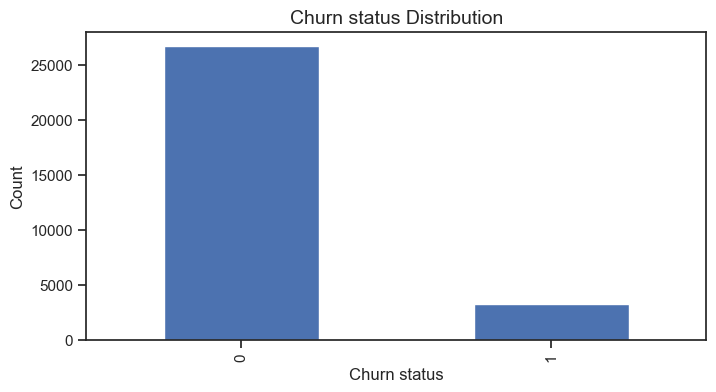

In [28]:
plt.figure(figsize=(8,4))
df['churn_flag'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Churn status')
plt.title('Churn status Distribution',fontsize=14)

In [29]:
df['churn_flag'].value_counts()*100/df['churn_flag'].shape[0]


0    89.132975
1    10.867025
Name: churn_flag, dtype: float64

This is a typical class imbalance problem where we can see that the data is skewed towards one variable

### Bivariate Analysis

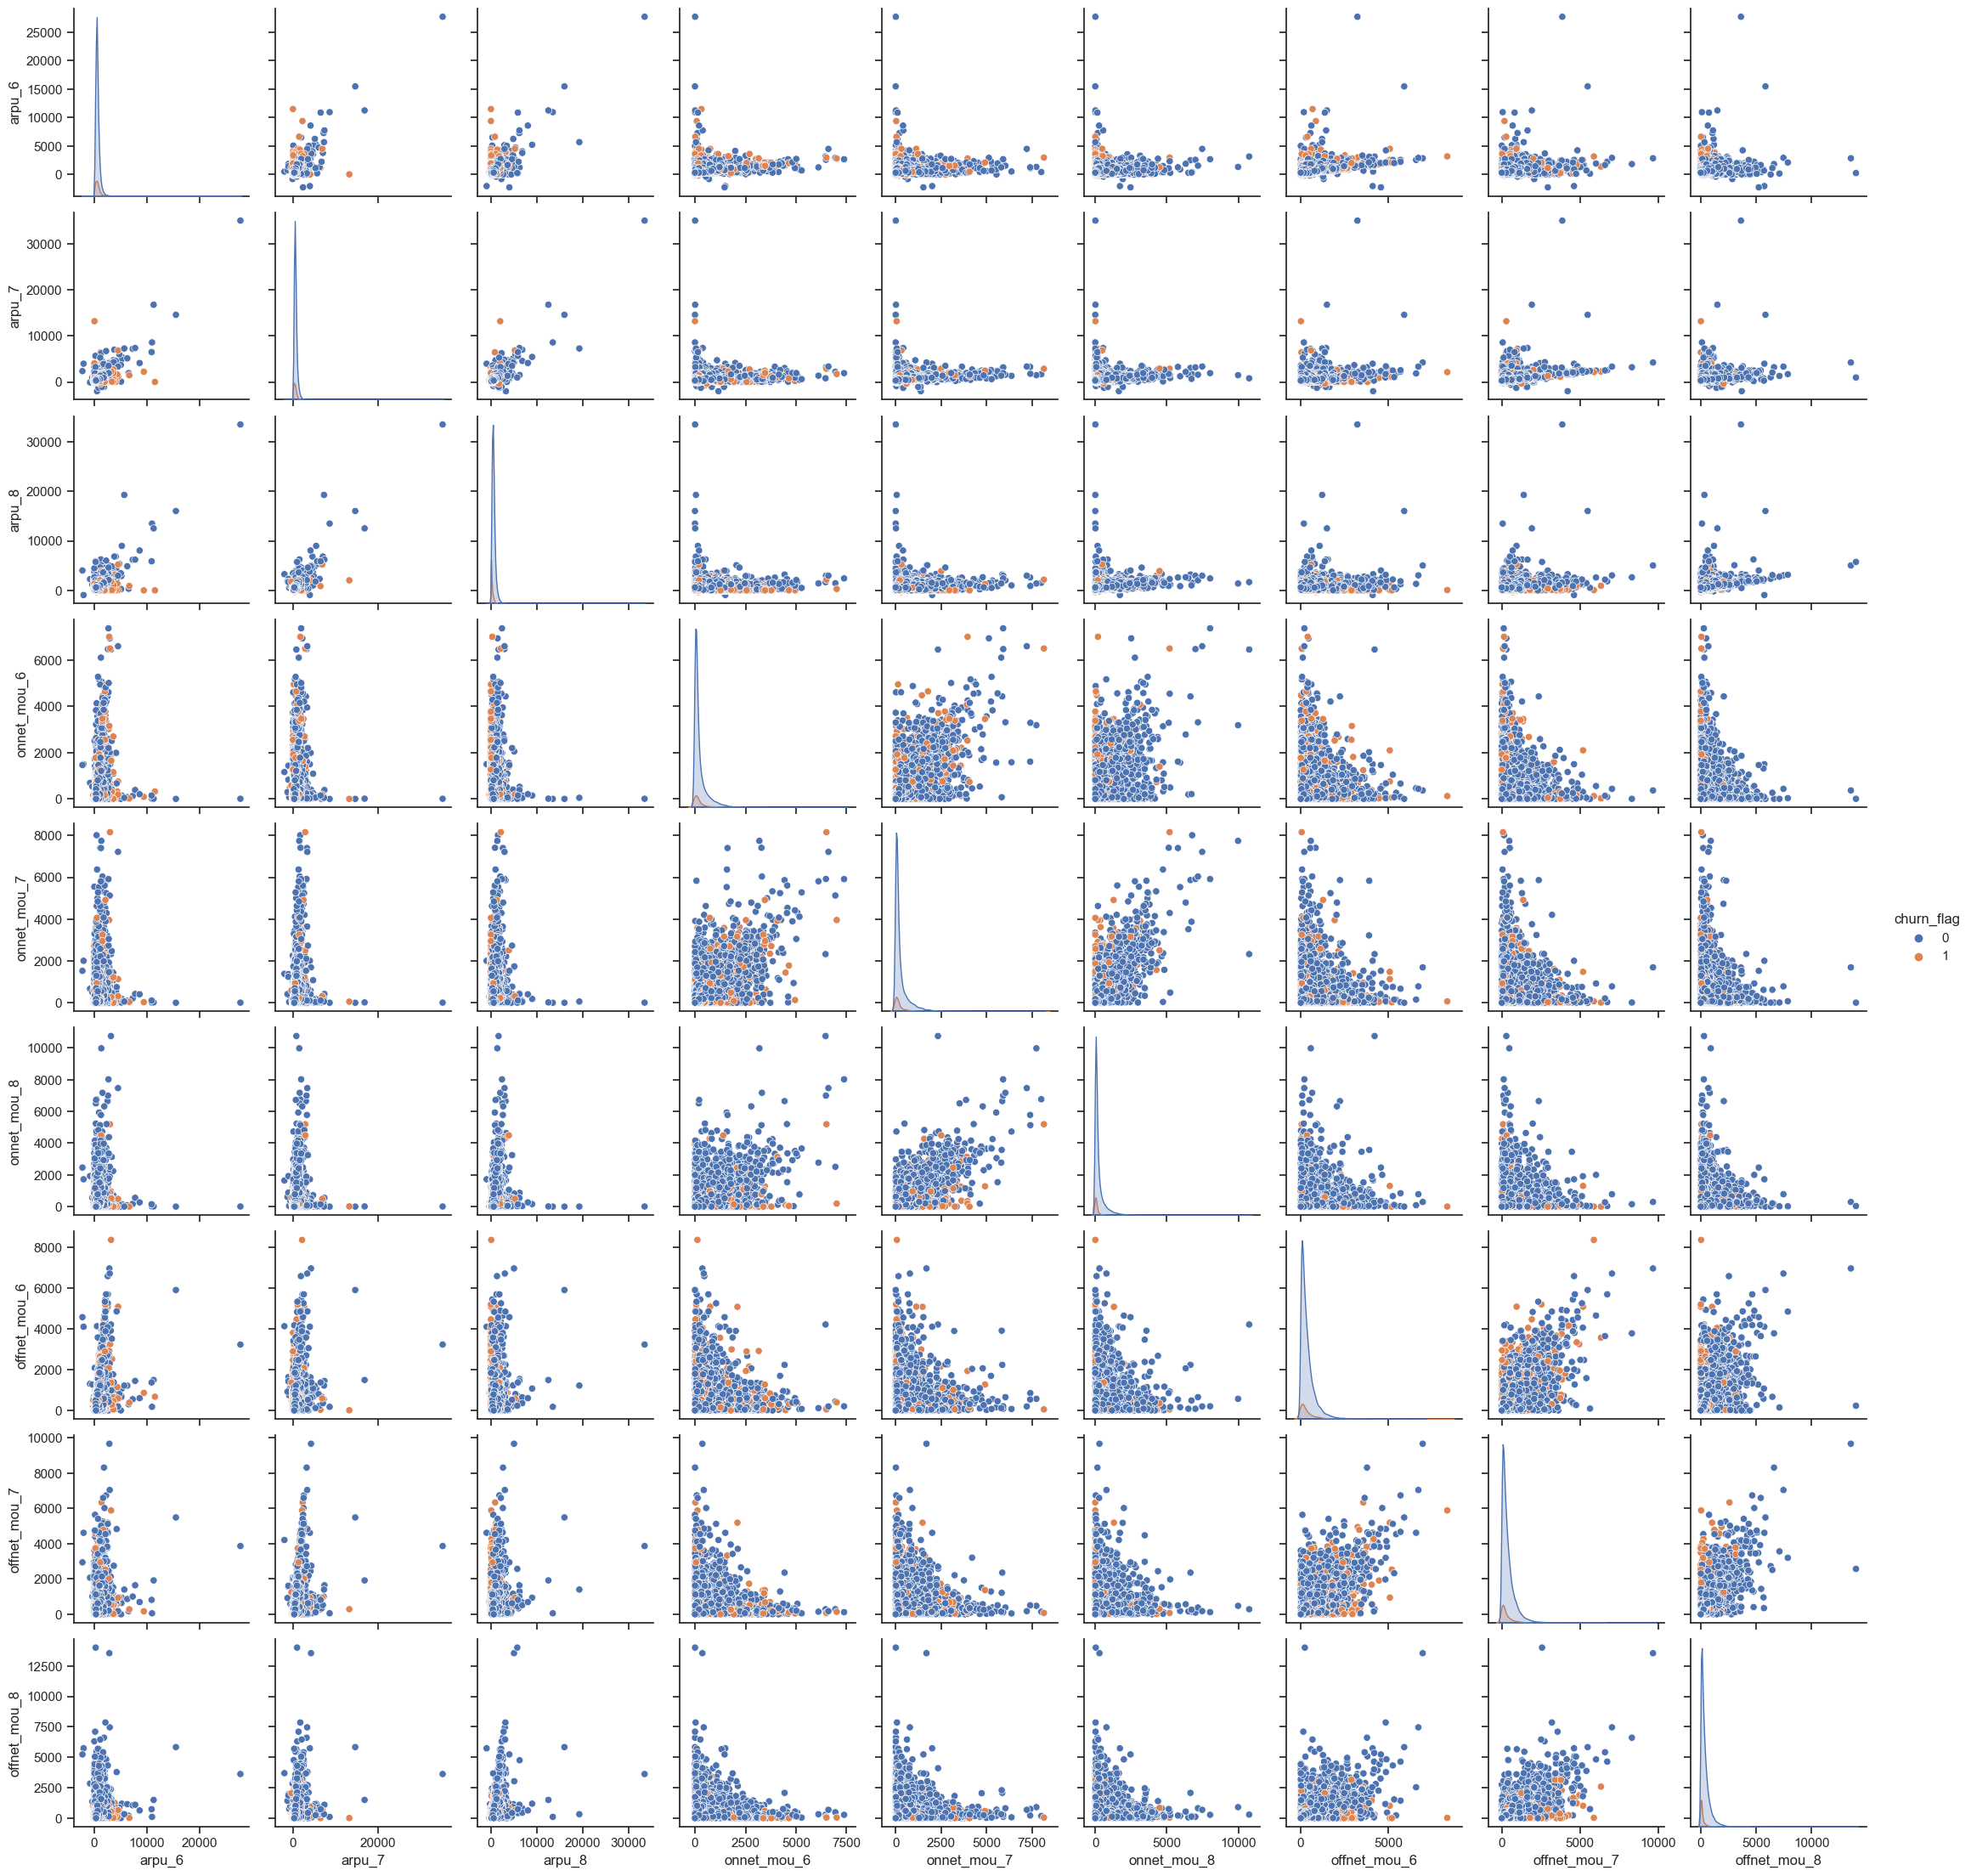

In [30]:
sns.pairplot(data=df[['arpu_6','arpu_7','arpu_8','churn_flag','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8']],hue='churn_flag')


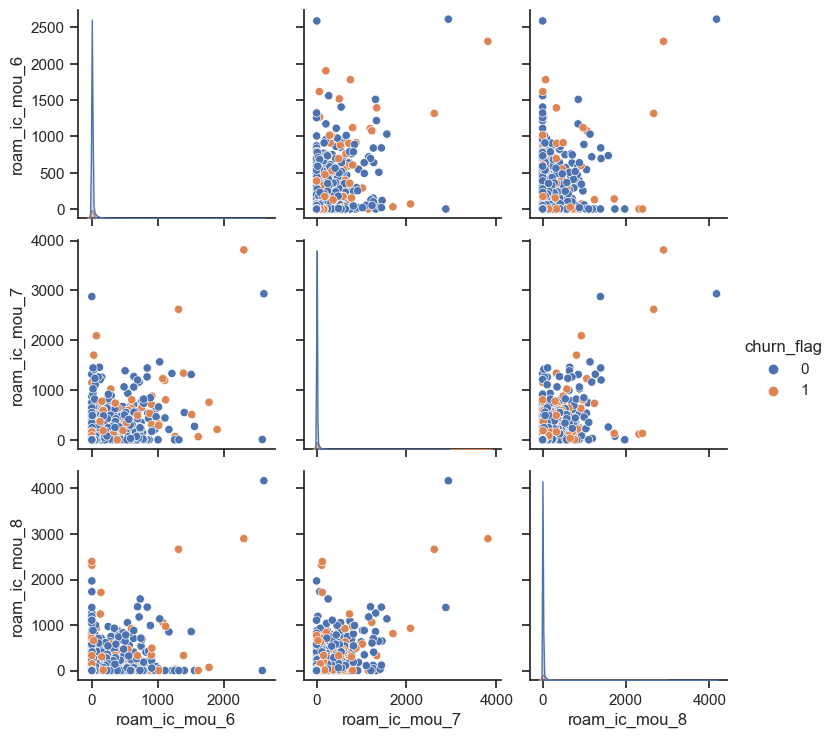

In [31]:
sns.pairplot(data=df[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','churn_flag']],hue='churn_flag')


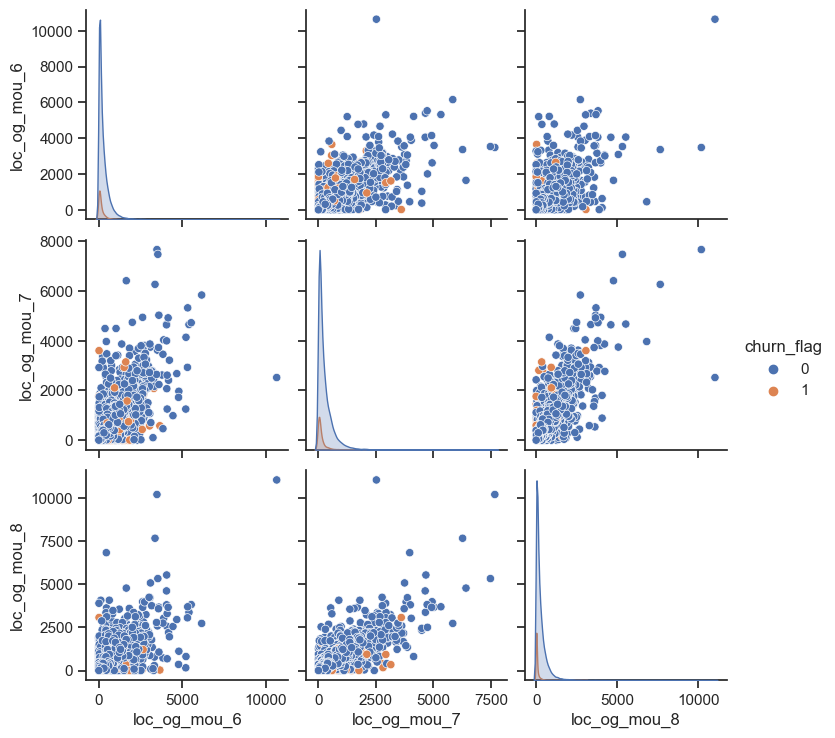

In [32]:
sns.pairplot(data=df[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','churn_flag']],hue='churn_flag')


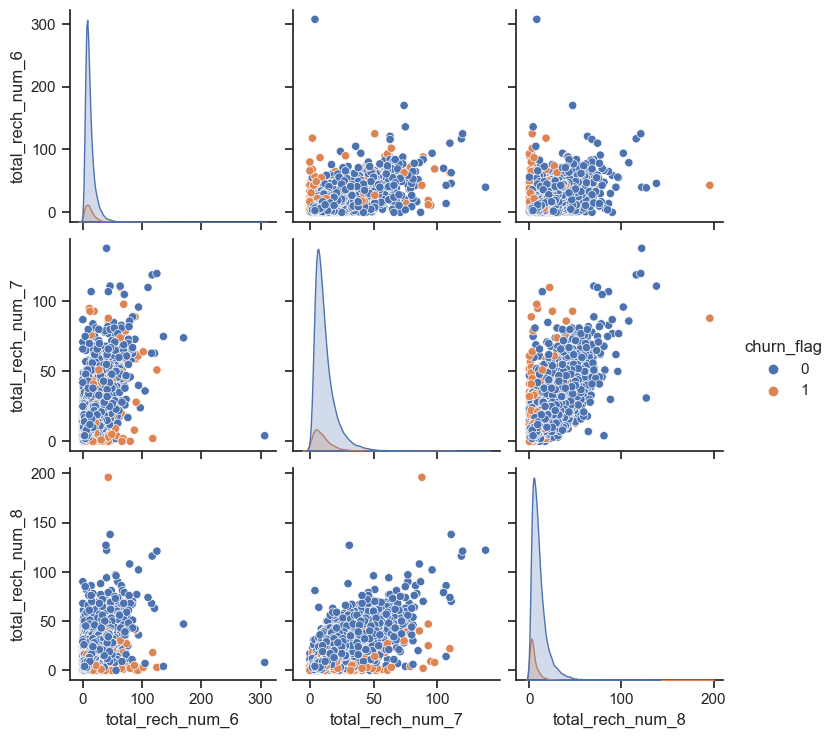

In [33]:
sns.pairplot(data=df[['total_rech_num_6','total_rech_num_7','total_rech_num_8','churn_flag']],hue='churn_flag')


C:\Users\Saroj_Sahu\AppData\Local\Temp\ipykernel_11908\400548462.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['churn_flag']==1].total_rech_num_6, bins = 30, ax = axes[0], kde = False)
C:\Users\Saroj_Sahu\AppData\Local\Temp\ipykernel_11908\400548462.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750b

<Axes: xlabel='churn_flag', ylabel='total_rech_num_6'>

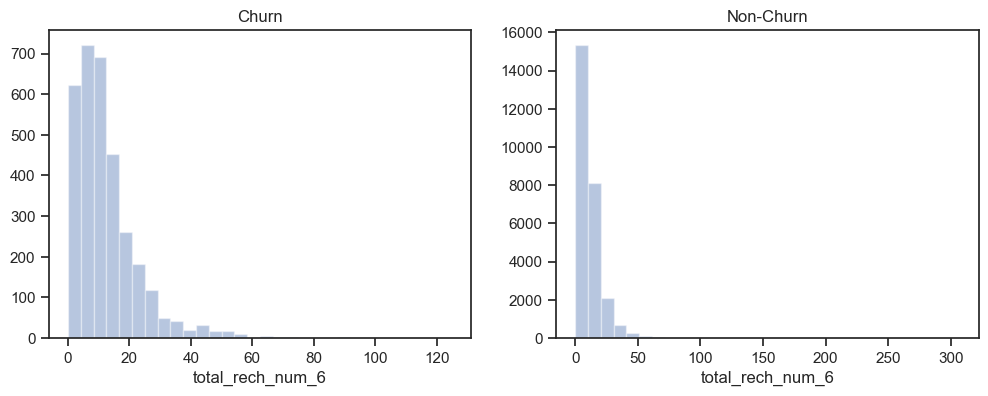

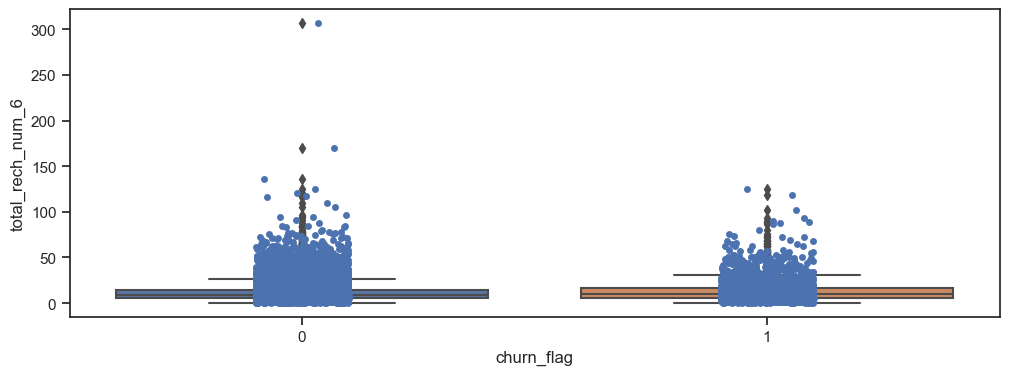

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].total_rech_num_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].total_rech_num_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='total_rech_num_6', data=df)
sns.stripplot(x='churn_flag', y='total_rech_num_6', data=df, jitter=True, edgecolor="gray")

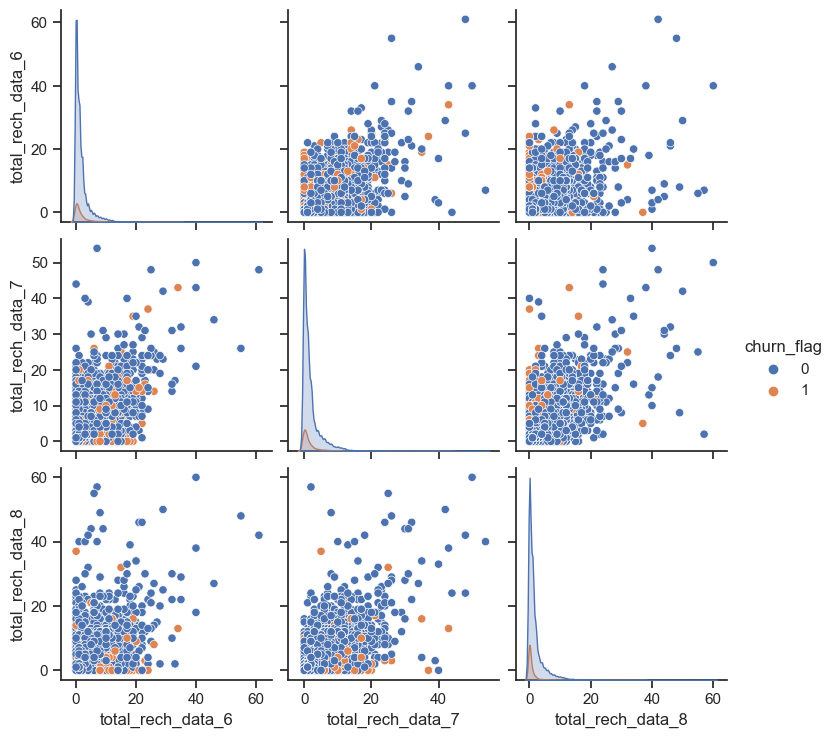

In [35]:
sns.pairplot(data=df[['total_rech_data_6','total_rech_data_7','total_rech_data_8','churn_flag']],hue='churn_flag')


In [36]:
# Now let's create new features from date column

import datetime as dt

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
            ]

df['date_of_last_rech_6'] = pd.to_datetime(df['date_of_last_rech_6'])
df['date_of_last_rech_7'] = pd.to_datetime(df['date_of_last_rech_7'])
df['date_of_last_rech_8'] = pd.to_datetime(df['date_of_last_rech_8'])

df['date_of_last_rech_data_6'] = pd.to_datetime(df['date_of_last_rech_data_6'])
df['date_of_last_rech_data_7'] = pd.to_datetime(df['date_of_last_rech_data_7'])
df['date_of_last_rech_data_8'] = pd.to_datetime(df['date_of_last_rech_data_8'])

df['date_of_last_rech_day_6'] = df['date_of_last_rech_6'].dt.day

df['date_of_last_rech_dayofwk_6'] = df['date_of_last_rech_6'].dt.dayofweek.astype(str)

df['date_of_last_rech_day_7'] = df['date_of_last_rech_7'].dt.day
df['date_of_last_rech_dayofwk_7'] = df['date_of_last_rech_7'].dt.dayofweek.astype(str)

df['date_of_last_rech_day_8'] = df['date_of_last_rech_8'].dt.day
df['date_of_last_rech_dayofwk_8'] = df['date_of_last_rech_8'].dt.dayofweek.astype(str)

df['date_of_last_rech_data_day_6'] = df['date_of_last_rech_data_6'].dt.day
df['date_of_last_rech_data_dayofwk_6'] = df['date_of_last_rech_data_6'].dt.dayofweek.astype(str)

df['date_of_last_rech_data_day_7'] = df['date_of_last_rech_data_7'].dt.day
df['date_of_last_rech_data_dayofwk_7'] = df['date_of_last_rech_data_7'].dt.dayofweek.astype(str)

df['date_of_last_rech_data_day_8'] = df['date_of_last_rech_data_8'].dt.day
df['date_of_last_rech_data_dayofwk_8'] = df['date_of_last_rech_data_8'].dt.dayofweek.astype(str)

Let's check the correlation between features



In [37]:
# Exclude columns_to_exclude from the DataFrame
columns_to_include = [col for col in df.columns if col not in date_cols]

joincorr= df[columns_to_include].corr()
df_corr = joincorr.stack().reset_index().sort_values(by = 0, ascending = False)
df_corr[((df_corr[0] < 1) & (df_corr[0] >= 0.4)) | ((df_corr[0] <= -0.4) & (df_corr[0] > -1))]

C:\Users\Saroj_Sahu\AppData\Local\Temp\ipykernel_11908\1807214242.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  joincorr= df[columns_to_include].corr()


level_0                       level_1         0
22743                   sachet_2g_8               count_rech_2g_8  0.987175
18342               count_rech_2g_8                   sachet_2g_8  0.987175
18177               count_rech_2g_7                   sachet_2g_7  0.986423
22578                   sachet_2g_7               count_rech_2g_7  0.986423
22413                   sachet_2g_6               count_rech_2g_6  0.984939
18012               count_rech_2g_6                   sachet_2g_6  0.984939
25573                    amt_data_7             total_data_rech_7  0.971176
25247             total_data_rech_7                    amt_data_7  0.971176
25408                    amt_data_6             total_data_rech_6  0.970228
25082             total_data_rech_6                    amt_data_6  0.970228
21465              night_pck_user_6                     fb_user_6  0.956578
23910                     fb_user_6              night_pck_user_6  0.956578
24075                     fb_user_7              night_pck_user_7  0.956280
21630              night_pck_user_7                     fb_user_7  0.956280
588                          arpu_8              total_rech_amt_8  0.955322
15747              total_rech_amt_8                        arpu_8  0.955322
24240                     fb_user_8              night_pck_user_8  0.954790
21795              night_pck_user_8                     fb_user_8  0.954790
7423                   isd_og_mou_8                  isd_og_mou_6  0.950194
7097                   isd_og_mou_6                  isd_og_mou_8  0.950194
7261                   isd_og_mou_7                  isd_og_mou_8  0.949809
7424                   isd_og_mou_8                  isd_og_mou_7  0.949809
15417              total_rech_amt_6                        arpu_6  0.946104
258                          arpu_6              total_rech_amt_6  0.946104
15582              total_rech_amt_7                        arpu_7  0.943571
423                          arpu_7              total_rech_amt_7  0.943571
20952                     arpu_2g_6                     arpu_3g_6  0.940080
20463                     arpu_3g_6                     arpu_2g_6  0.940080
21282                     arpu_2g_8                     arpu_3g_8  0.937734
20793                     arpu_3g_8                     arpu_2g_8  0.937734
20628                     arpu_3g_7                     arpu_2g_7  0.936434
21117                     arpu_2g_7                     arpu_3g_7  0.936434
7259                   isd_og_mou_7                  isd_og_mou_6  0.933275
7096                   isd_og_mou_6                  isd_og_mou_7  0.933275
17979               count_rech_2g_6             total_rech_data_6  0.911366
17001             total_rech_data_6               count_rech_2g_6  0.911366
18144               count_rech_2g_7             total_rech_data_7  0.910260
17166             total_rech_data_7               count_rech_2g_7  0.910260
17331             total_rech_data_8               count_rech_2g_8  0.906649
18309               count_rech_2g_8             total_rech_data_8  0.906649
17193             total_rech_data_7                   sachet_2g_7  0.904233
22572                   sachet_2g_7             total_rech_data_7  0.904233
17028             total_rech_data_6                   sachet_2g_6  0.903868
22407                   sachet_2g_6             total_rech_data_6  0.903868
22737                   sachet_2g_8             total_rech_data_8  0.900628
17358             total_rech_data_8                   sachet_2g_8  0.900628
10575                  loc_ic_mou_6                total_ic_mou_6  0.895350
13020                total_ic_mou_6                  loc_ic_mou_6  0.895350
13350                total_ic_mou_8                  loc_ic_mou_8  0.893826
10905                  loc_ic_mou_8                total_ic_mou_8  0.893826
13185                total_ic_mou_7                  loc_ic_mou_7  0.883161
10740                  loc_ic_mou_7                total_ic_mou_7  0.883161


# Derive New features

The Main intent here is to derive features that can try to infer the usage / pattern that helps in understanding data

Lets compare the behaviour of good months and action months

1. Coming up with the flag which indicates where the action month (8) does good on average compared to good months( 6 and 7) . This flag will be 0

In [38]:
import warnings

# To suppress all warnings
warnings.filterwarnings("ignore")


In [39]:
df['AVG_arpu_6_7'] = df[['arpu_6','arpu_7']].mean(axis=1)
df['is_arpu_flag'] = np.where((df['arpu_8'] > df['AVG_arpu_6_7']), 0, 1)

df['AVG_onnet_mou_6_7'] = df[['onnet_mou_6','onnet_mou_7']].mean(axis=1)
df['is_onnet_mou_flag'] = np.where((df['onnet_mou_8'] > df['AVG_onnet_mou_6_7']), 0, 1)

df['AVG_offnet_mou_6_7'] = df[['offnet_mou_6','offnet_mou_7']].mean(axis=1)
df['is_offnet_mou_flag'] = np.where((df['offnet_mou_8'] > df['AVG_offnet_mou_6_7']), 0, 1)

df['AVG_roam_ic_mou_6_7'] = df[['roam_ic_mou_6','roam_ic_mou_7']].mean(axis=1)
df['is_roam_ic_mou_flag'] = np.where((df['roam_ic_mou_8'] > df['AVG_roam_ic_mou_6_7']), 0, 1)

df['AVG_roam_og_mou_6_7'] = df[['roam_og_mou_6','roam_og_mou_7']].mean(axis=1)
df['is_roam_og_mou_flag'] = np.where((df['roam_og_mou_8'] > df['AVG_roam_og_mou_6_7']), 0, 1)

df['AVG_loc_og_t2t_mou_6_7'] = df[['loc_og_t2t_mou_6','loc_og_t2t_mou_7']].mean(axis=1)
df['is_loc_og_t2t_mou_flag'] = np.where((df['loc_og_t2t_mou_8'] > df['AVG_loc_og_t2t_mou_6_7']), 0, 1)

df['AVG_loc_og_t2m_mou_6_7'] = df[['loc_og_t2m_mou_6','loc_og_t2m_mou_7']].mean(axis=1)
df['is_loc_og_t2m_mou_flag'] = np.where((df['loc_og_t2m_mou_8'] > df['AVG_loc_og_t2m_mou_6_7']), 0, 1)

df['AVG_loc_og_t2f_mou_6_7'] = df[['loc_og_t2f_mou_6','loc_og_t2f_mou_7']].mean(axis=1)
df['is_loc_og_t2f_mou_flag'] = np.where((df['loc_og_t2f_mou_8'] > df['AVG_loc_og_t2f_mou_6_7']), 0, 1)

df['AVG_loc_og_t2c_mou_6_7'] = df[['loc_og_t2c_mou_6','loc_og_t2c_mou_7']].mean(axis=1)
df['is_loc_og_t2c_mou_flag'] = np.where((df['loc_og_t2c_mou_8'] > df['AVG_loc_og_t2c_mou_6_7']), 0, 1)

df['AVG_std_og_t2t_mou_6_7'] = df[['std_og_t2t_mou_6','std_og_t2t_mou_7']].mean(axis=1)
df['is_std_og_t2t_mou_flag'] = np.where((df['std_og_t2t_mou_8'] > df['AVG_std_og_t2t_mou_6_7']), 0, 1)

df['AVG_std_og_t2m_mou_6_7'] = df[['std_og_t2m_mou_6','std_og_t2m_mou_7']].mean(axis=1)
df['is_std_og_t2m_mou_flag'] = np.where((df['std_og_t2m_mou_8'] > df['AVG_std_og_t2m_mou_6_7']), 0, 1)

df['AVG_std_og_t2f_mou_6_7'] = df[['std_og_t2f_mou_6','std_og_t2f_mou_7']].mean(axis=1)
df['is_std_og_t2f_mou_flag'] = np.where((df['std_og_t2f_mou_8'] > df['AVG_std_og_t2f_mou_6_7']), 0, 1)

df['AVG_isd_og_mou_6_7'] = df[['isd_og_mou_6','isd_og_mou_7']].mean(axis=1)
df['is_isd_og_mou_flag'] = np.where((df['isd_og_mou_8'] > df['AVG_isd_og_mou_6_7']), 0, 1)

df['AVG_spl_og_mou_6_7'] = df[['spl_og_mou_6','spl_og_mou_7']].mean(axis=1)
df['is_spl_og_mou_flag'] = np.where((df['spl_og_mou_8'] > df['AVG_spl_og_mou_6_7']), 0, 1)

df['AVG_og_others_6_7'] = df[['og_others_6','og_others_7']].mean(axis=1)
df['is_og_others_flag'] = np.where((df['og_others_8'] > df['AVG_og_others_6_7']), 0, 1)


df['AVG_loc_ic_t2t_mou_6_7'] = df[['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7']].mean(axis=1)
df['is_loc_ic_t2t_mou_flag'] = np.where((df['loc_ic_t2t_mou_8'] > df['AVG_loc_ic_t2t_mou_6_7']), 0, 1)

df['AVG_loc_ic_t2m_mou_6_7'] = df[['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7']].mean(axis=1)
df['is_loc_ic_t2m_mou_flag'] = np.where((df['loc_ic_t2m_mou_8'] > df['AVG_loc_ic_t2m_mou_6_7']), 0, 1)

df['AVG_loc_ic_t2f_mou_6_7'] = df[['loc_ic_t2f_mou_6','loc_ic_t2f_mou_7']].mean(axis=1)
df['is_loc_ic_t2f_mou_flag'] = np.where((df['loc_ic_t2f_mou_8'] > df['AVG_loc_ic_t2f_mou_6_7']), 0, 1)

df['AVG_std_ic_t2t_mou_6_7'] = df[['std_ic_t2t_mou_6','std_ic_t2t_mou_7']].mean(axis=1)
df['is_std_ic_t2t_mou_flag'] = np.where((df['std_ic_t2t_mou_8'] > df['AVG_std_ic_t2t_mou_6_7']), 0, 1)

df['AVG_std_ic_t2m_mou_6_7'] = df[['std_ic_t2m_mou_6','std_ic_t2m_mou_7']].mean(axis=1)
df['is_std_ic_t2m_mou_flag'] = np.where((df['std_ic_t2m_mou_8'] > df['AVG_std_ic_t2m_mou_6_7']), 0, 1)

df['AVG_std_ic_t2f_mou_6_7'] = df[['std_ic_t2f_mou_6','std_ic_t2f_mou_7']].mean(axis=1)
df['is_std_ic_t2f_mou_flag'] = np.where((df['std_ic_t2f_mou_8'] > df['AVG_std_ic_t2f_mou_6_7']), 0, 1)

df['AVG_spl_ic_mou_6_7'] = df[['spl_ic_mou_6','spl_ic_mou_7']].mean(axis=1)
df['is_spl_ic_mou_flag'] = np.where((df['spl_ic_mou_8'] > df['AVG_spl_ic_mou_6_7']), 0, 1)

df['AVG_isd_ic_mou_6_7'] = df[['isd_ic_mou_6','isd_ic_mou_7']].mean(axis=1)
df['is_isd_ic_mou_flag'] = np.where((df['isd_ic_mou_8'] > df['AVG_isd_ic_mou_6_7']), 0, 1)

df['AVG_ic_others_6_7'] = df[['ic_others_6','ic_others_7']].mean(axis=1)
df['is_ic_others_flag'] = np.where((df['ic_others_8'] > df['AVG_ic_others_6_7']), 0, 1)

df['AVG_total_rech_amt_6_7'] = df[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)
df['is_total_rech_amt_flag'] = np.where((df['total_rech_amt_8'] > df['AVG_total_rech_amt_6_7']), 0, 1)

df['AVG_vol_2g_mb_6_7'] = df[['vol_2g_mb_6','vol_2g_mb_7']].mean(axis=1)
df['is_vol_2g_mb_flag'] = np.where((df['vol_2g_mb_8'] > df['AVG_vol_2g_mb_6_7']), 0, 1)

df['AVG_vol_3g_mb_6_7'] = df[['vol_3g_mb_6','vol_3g_mb_7']].mean(axis=1)
df['is_vol_3g_mb_flag'] = np.where((df['vol_3g_mb_8'] > df['AVG_vol_3g_mb_6_7']), 0, 1)

df['AVG_arpu_3g_6_7'] = df[['arpu_3g_6','arpu_3g_7']].mean(axis=1)
df['is_arpu_3g_flag'] = np.where((df['arpu_3g_8'] > df['AVG_arpu_3g_6_7']), 0, 1)

df['AVG_arpu_2g_6_7'] = df[['arpu_2g_6','arpu_2g_7']].mean(axis=1)
df['is_arpu_2g_flag'] = np.where((df['arpu_2g_8'] > df['AVG_arpu_2g_6_7']), 0, 1)

df['AVG_vbc_3g_6_7'] = df[['jun_vbc_3g','jul_vbc_3g']].mean(axis=1)
df['is_vbc_3g_flag'] = np.where((df['aug_vbc_3g'] > df['AVG_vbc_3g_6_7']), 0, 1)

df['AVG_loc_og_mou_6_7'] = df[['loc_og_mou_6','loc_og_mou_7']].mean(axis=1)
df['is_loc_og_mou_flag'] = np.where((df['loc_og_mou_8'] > df['AVG_loc_og_mou_6_7']), 0, 1)

df['AVG_std_og_mou_6_7'] = df[['std_og_mou_6','std_og_mou_7']].mean(axis=1)
df['is_std_og_mou_flag'] = np.where((df['std_og_mou_8'] > df['AVG_std_og_mou_6_7']), 0, 1)

df['AVG_total_og_mou_6_7'] = df[['total_og_mou_6','total_og_mou_7']].mean(axis=1)
df['is_total_og_mou_flag'] = np.where((df['total_og_mou_8'] > df['AVG_total_og_mou_6_7']), 0, 1)

df['AVG_loc_ic_mou_6_7'] = df[['loc_ic_mou_6','loc_ic_mou_7']].mean(axis=1)
df['is_loc_ic_mou_flag'] = np.where((df['loc_ic_mou_8'] > df['AVG_loc_ic_mou_6_7']), 0, 1)

df['AVG_std_ic_mou_6_7'] = df[['std_ic_mou_6','std_ic_mou_7']].mean(axis=1)
df['is_std_ic_mou_flag'] = np.where((df['std_ic_mou_8'] > df['AVG_std_ic_mou_6_7']), 0, 1)

df['AVG_total_ic_mou_6_7'] = df[['total_ic_mou_6','total_ic_mou_7']].mean(axis=1)
df['is_total_ic_mou_flag'] = np.where((df['total_ic_mou_8'] > df['AVG_total_ic_mou_6_7']), 0, 1)


df['AVG_monthly_2g_6_7'] = df[['monthly_2g_6','monthly_2g_7']].mean(axis=1)
df['is_monthly_2g_flag'] = np.where((df['monthly_2g_8'] > df['AVG_monthly_2g_6_7']), 0, 1)

df['AVG_sachet_2g_6_7'] = df[['sachet_2g_6','sachet_2g_7']].mean(axis=1)
df['is_sachet_2g_flag'] = np.where((df['sachet_2g_8'] > df['AVG_sachet_2g_6_7']), 0, 1)

df['AVG_monthly_3g_6_7'] = df[['monthly_3g_6','monthly_3g_7']].mean(axis=1)
df['is_monthly_3g_flag'] = np.where((df['monthly_3g_8'] > df['AVG_monthly_3g_6_7']), 0, 1)

df['AVG_sachet_3g_6_7'] = df[['sachet_3g_6','sachet_3g_7']].mean(axis=1)
df['is_sachet_3g_flag'] = np.where((df['sachet_3g_8'] > df['AVG_sachet_3g_6_7']), 0, 1)



2. Also lets create month on month difference to check if there are any signs of churns

In [40]:
# Create month on month change features to understand any risk associated with the churn
df['loc_og_t2t_mou_7diff6'] = df['loc_og_t2t_mou_7'] - df['loc_og_t2t_mou_6']
df['loc_og_t2m_mou_7diff6'] = df['loc_og_t2m_mou_7'] - df['loc_og_t2m_mou_6']
df['loc_og_t2f_mou_7diff6'] = df['loc_og_t2f_mou_7'] - df['loc_og_t2f_mou_6']
df['loc_og_t2c_mou_7diff6'] = df['loc_og_t2c_mou_7'] - df['loc_og_t2c_mou_6']
df['loc_og_mou_7diff6'] = df['loc_og_mou_7'] - df['loc_og_mou_6']
df['std_og_t2t_mou_7diff6'] = df['std_og_t2t_mou_7'] - df['std_og_t2t_mou_6']
df['std_og_t2m_mou_7diff6'] = df['std_og_t2m_mou_7'] - df['std_og_t2m_mou_6']
df['std_og_t2f_mou_7diff6'] = df['std_og_t2f_mou_7'] - df['std_og_t2f_mou_6']
df['std_og_mou_7diff6'] = df['std_og_mou_7'] - df['std_og_mou_6']
df['loc_og_mou_7diff6'] = df['loc_og_mou_7'] - df['loc_og_mou_6']
df['std_og_mou_7diff6'] = df['std_og_mou_7'] - df['std_og_mou_6']
df['isd_og_mou_7diff6'] = df['isd_og_mou_7'] - df['isd_og_mou_6']
df['spl_og_mou_7diff6'] = df['spl_og_mou_7'] - df['spl_og_mou_6']
df['og_others_7diff6'] = df['og_others_7'] - df['og_others_6']
df['total_og_mou_7diff6'] = df['total_og_mou_7'] - df['total_og_mou_6']

df['loc_og_t2t_mou_8diff7'] = df['loc_og_t2t_mou_8'] - df['loc_og_t2t_mou_7']
df['loc_og_t2m_mou_8diff7'] = df['loc_og_t2m_mou_8'] - df['loc_og_t2m_mou_7']
df['loc_og_t2f_mou_8diff7'] = df['loc_og_t2f_mou_8'] - df['loc_og_t2f_mou_7']
df['loc_og_t2c_mou_8diff7'] = df['loc_og_t2c_mou_8'] - df['loc_og_t2c_mou_7']
df['loc_og_mou_8diff7'] = df['loc_og_mou_8'] - df['loc_og_mou_7']
df['std_og_t2t_mou_8diff7'] = df['std_og_t2t_mou_8'] - df['std_og_t2t_mou_7']
df['std_og_t2m_mou_8diff7'] = df['std_og_t2m_mou_8'] - df['std_og_t2m_mou_7']
df['std_og_t2f_mou_8diff7'] = df['std_og_t2f_mou_8'] - df['std_og_t2f_mou_7']
df['std_og_mou_8diff7'] = df['std_og_mou_8'] - df['std_og_mou_7']
df['loc_og_mou_8diff7'] = df['loc_og_mou_8'] - df['loc_og_mou_7']
df['std_og_mou_8diff7'] = df['std_og_mou_8'] - df['std_og_mou_7']
df['isd_og_mou_8diff7'] = df['isd_og_mou_8'] - df['isd_og_mou_7']
df['spl_og_mou_8diff7'] = df['spl_og_mou_8'] - df['spl_og_mou_7']
df['og_others_8diff7'] = df['og_others_8'] - df['og_others_7']
df['total_og_mou_8diff7'] = df['total_og_mou_8'] - df['total_og_mou_7']

df['loc_ic_t2t_mou_7diff6'] = df['loc_ic_t2t_mou_7'] - df['loc_ic_t2t_mou_6']
df['loc_ic_t2m_mou_7diff6'] = df['loc_ic_t2m_mou_7'] - df['loc_ic_t2m_mou_6']
df['loc_ic_t2f_mou_7diff6'] = df['loc_ic_t2f_mou_7'] - df['loc_ic_t2f_mou_6']
df['loc_ic_mou_7diff6'] = df['loc_ic_mou_7'] - df['loc_ic_mou_6']
df['std_ic_t2t_mou_7diff6'] = df['std_ic_t2t_mou_7'] - df['std_ic_t2t_mou_6']
df['std_ic_t2m_mou_7diff6'] = df['std_ic_t2m_mou_7'] - df['std_ic_t2m_mou_6']
df['std_ic_t2f_mou_7diff6'] = df['std_ic_t2f_mou_7'] - df['std_ic_t2f_mou_6']
df['std_ic_mou_7diff6'] = df['std_ic_mou_7'] - df['std_ic_mou_6']
df['loc_ic_mou_7diff6'] = df['loc_ic_mou_7'] - df['loc_ic_mou_6']
df['std_ic_mou_7diff6'] = df['std_ic_mou_7'] - df['std_ic_mou_6']
df['spl_ic_mou_7diff6'] = df['spl_ic_mou_7'] - df['spl_ic_mou_6']
df['isd_ic_mou_7diff6'] = df['isd_ic_mou_7'] - df['isd_ic_mou_6']
df['ic_others_7diff6'] = df['ic_others_7'] - df['ic_others_6']
df['total_ic_mou_7diff6'] = df['total_ic_mou_7'] - df['total_ic_mou_6']

df['loc_ic_t2t_mou_8diff7'] = df['loc_ic_t2t_mou_8'] - df['loc_ic_t2t_mou_7']
df['loc_ic_t2m_mou_8diff7'] = df['loc_ic_t2m_mou_8'] - df['loc_ic_t2m_mou_7']
df['loc_ic_t2f_mou_8diff7'] = df['loc_ic_t2f_mou_8'] - df['loc_ic_t2f_mou_7']
df['loc_ic_mou_8diff7'] = df['loc_ic_mou_8'] - df['loc_ic_mou_7']
df['std_ic_t2t_mou_8diff7'] = df['std_ic_t2t_mou_8'] - df['std_ic_t2t_mou_7']
df['std_ic_t2m_mou_8diff7'] = df['std_ic_t2m_mou_8'] - df['std_ic_t2m_mou_7']
df['std_ic_t2f_mou_8diff7'] = df['std_ic_t2f_mou_8'] - df['std_ic_t2f_mou_7']
df['std_ic_mou_8diff7'] = df['std_ic_mou_8'] - df['std_ic_mou_7']
df['loc_ic_mou_8diff7'] = df['loc_ic_mou_8'] - df['loc_ic_mou_7']
df['std_ic_mou_8diff7'] = df['std_ic_mou_8'] - df['std_ic_mou_7']
df['spl_ic_mou_8diff7'] = df['spl_ic_mou_8'] - df['spl_ic_mou_7']
df['isd_ic_mou_8diff7'] = df['isd_ic_mou_8'] - df['isd_ic_mou_7']
df['ic_others_8diff7'] = df['ic_others_8'] - df['ic_others_7']
df['total_ic_mou_8diff7'] = df['total_ic_mou_8'] - df['total_ic_mou_7']

df['onnet_mou_7diff6'] = df['onnet_mou_7'] - df['onnet_mou_6']
df['onnet_mou_8diff7'] = df['onnet_mou_8'] - df['onnet_mou_7']

df['offnet_mou_7diff6'] = df['offnet_mou_7'] - df['offnet_mou_6']
df['offnet_mou_8diff7'] = df['offnet_mou_8'] - df['offnet_mou_7']

df['roam_ic_mou_7diff6'] = df['roam_ic_mou_7'] - df['roam_ic_mou_6']
df['roam_ic_mou_8diff7'] = df['roam_ic_mou_8'] - df['roam_ic_mou_7']

df['roam_og_mou_7diff6'] = df['roam_og_mou_7'] - df['roam_og_mou_6']
df['roam_og_mou_8diff7'] = df['roam_og_mou_8'] - df['roam_og_mou_7']

df['total_rech_amt_7diff6'] = df['total_rech_amt_7'] - df['total_rech_amt_6']
df['total_rech_amt_8diff7'] = df['total_rech_amt_8'] - df['total_rech_amt_7']

df['vol_2g_mb_7diff6'] = df['vol_2g_mb_7'] - df['vol_2g_mb_6']
df['vol_2g_mb_8diff7'] = df['vol_2g_mb_8'] - df['vol_2g_mb_7']

df['vol_3g_mb_7diff6'] = df['vol_3g_mb_7'] - df['vol_3g_mb_6']
df['vol_3g_mb_8diff7'] = df['vol_3g_mb_8'] - df['vol_3g_mb_7']

df['vbc_3g_7diff6'] = df['jul_vbc_3g'] - df['jun_vbc_3g']
df['vbc_3g_8diff7'] = df['aug_vbc_3g'] - df['jul_vbc_3g']



df['date_of_last_rech_7diff6'] = (df['date_of_last_rech_7'] - df['date_of_last_rech_6']).dt.days
df['date_of_last_rech_8diff7'] = (df['date_of_last_rech_8'] - df['date_of_last_rech_7']).dt.days

df['date_of_last_rech_data_7diff6'] = (df['date_of_last_rech_data_7'] - df['date_of_last_rech_data_6']).dt.days
df['date_of_last_rech_data_8diff7'] = (df['date_of_last_rech_data_8'] - df['date_of_last_rech_data_7']).dt.days


In [41]:
id_cols = ['mobile_number', 'circle_id']

# Feature Selection


1. Lets remove some of the features that are used to create new derived features


In [42]:

df.drop(list(df.select_dtypes(include=['datetime64']).columns),axis=1,inplace=True)

df.drop(['arpu_6','arpu_7','onnet_mou_6','onnet_mou_7','offnet_mou_6','offnet_mou_7',
         'roam_ic_mou_6','roam_ic_mou_7','roam_og_mou_6','roam_og_mou_7',
         'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2m_mou_6','loc_og_t2m_mou_7',
         'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2c_mou_6','loc_og_t2c_mou_7',
         'std_og_t2t_mou_6','std_og_t2t_mou_7', 'std_og_t2m_mou_6','std_og_t2m_mou_7',
         'std_og_t2f_mou_6','std_og_t2f_mou_7','isd_og_mou_6','isd_og_mou_7',
         'spl_og_mou_6','spl_og_mou_7', 'og_others_6','og_others_7',
         'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7',
         'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7', 'std_ic_t2t_mou_6','std_ic_t2t_mou_7',
         'std_ic_t2m_mou_6','std_ic_t2m_mou_7', 'std_ic_t2f_mou_6','std_ic_t2f_mou_7',
         'spl_ic_mou_6','spl_ic_mou_7', 'isd_ic_mou_6','isd_ic_mou_7',
         'ic_others_6','ic_others_7', 'total_rech_amt_6','total_rech_amt_7',
         'vol_2g_mb_6','vol_2g_mb_7', 'vol_3g_mb_6','vol_3g_mb_7',
         'arpu_3g_6','arpu_3g_7', 'arpu_2g_6','arpu_2g_7',
         'jun_vbc_3g','jul_vbc_3g', 'loc_og_mou_6', 'loc_og_mou_7','std_og_mou_6', 'std_og_mou_7',
          'total_og_mou_6', 'total_og_mou_7','loc_ic_mou_6', 'loc_ic_mou_7',
          'std_ic_mou_6', 'std_ic_mou_7','total_ic_mou_6', 'total_ic_mou_7',
          'total_rech_num_6', 'total_rech_num_7','night_pck_user_6', 'night_pck_user_7',
          'monthly_2g_6', 'monthly_2g_7','sachet_2g_6', 'sachet_2g_7',
          'monthly_3g_6', 'monthly_3g_7','sachet_3g_6', 'sachet_3g_7','fb_user_6', 'fb_user_7'
        ], axis=1, inplace=True)

In [43]:
df.drop(id_cols, axis=1, inplace=True)


2. Lets remove features that are highly correlated

In [44]:
columns_to_include = [col for col in df.columns if col not in date_cols]

joincorr= df[columns_to_include].corr()

In [45]:
AbsoluteCorrelationMatrix = joincorr.abs()


In [46]:
AbsoluteCorrelationMatrix = AbsoluteCorrelationMatrix.where(np.triu(np.ones(AbsoluteCorrelationMatrix.shape), k=1).astype(bool))


In [47]:

columns_to_include = [col for col in df.columns if col not in date_cols]

joincorr= df[columns_to_include].corr()

AbsoluteCorrelationMatrix = joincorr.abs()
AbsoluteCorrelationMatrix = AbsoluteCorrelationMatrix.where(np.triu(np.ones(AbsoluteCorrelationMatrix.shape), k=1).astype(bool))
highCorrelatedIndices = np.where(AbsoluteCorrelationMatrix > 0.8)
correlated_pairs = [(AbsoluteCorrelationMatrix.index[x], AbsoluteCorrelationMatrix.columns[y]) 
                     for x,y in zip(*highCorrelatedIndices) if x!=y and x < y]

print("Total Number of correlated pairs: ", len(correlated_pairs))
print(correlated_pairs)

Total Number of correlated pairs:  61
[('arpu_8', 'total_rech_amt_8'), ('onnet_mou_8', 'std_og_t2t_mou_8'), ('offnet_mou_8', 'std_og_t2m_mou_8'), ('loc_og_t2t_mou_8', 'AVG_loc_og_t2t_mou_6_7'), ('loc_og_t2m_mou_8', 'AVG_loc_og_t2m_mou_6_7'), ('loc_og_mou_8', 'AVG_loc_og_mou_6_7'), ('std_og_mou_8', 'total_og_mou_8'), ('isd_og_mou_8', 'AVG_isd_og_mou_6_7'), ('loc_ic_t2t_mou_8', 'AVG_loc_ic_t2t_mou_6_7'), ('loc_ic_t2m_mou_8', 'loc_ic_mou_8'), ('loc_ic_t2m_mou_8', 'AVG_loc_ic_t2m_mou_6_7'), ('loc_ic_mou_8', 'total_ic_mou_8'), ('loc_ic_mou_8', 'AVG_loc_ic_mou_6_7'), ('std_ic_t2m_mou_8', 'std_ic_mou_8'), ('total_ic_mou_8', 'AVG_total_ic_mou_6_7'), ('total_rech_data_6', 'count_rech_2g_6'), ('total_rech_data_6', 'AVG_sachet_2g_6_7'), ('total_rech_data_7', 'count_rech_2g_7'), ('total_rech_data_7', 'AVG_sachet_2g_6_7'), ('total_rech_data_8', 'count_rech_2g_8'), ('total_rech_data_8', 'sachet_2g_8'), ('max_rech_data_8', 'av_rech_amt_data_8'), ('count_rech_2g_6', 'AVG_sachet_2g_6_7'), ('count_rech_

In [48]:
upper = AbsoluteCorrelationMatrix.where(np.triu(np.ones(AbsoluteCorrelationMatrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

In [49]:
df.drop(columns=to_drop, axis=1,inplace=True)


In [50]:
list(df.select_dtypes(include=[object]).columns)


['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_dayofwk_6',
 'date_of_last_rech_dayofwk_7',
 'date_of_last_rech_dayofwk_8',
 'date_of_last_rech_data_dayofwk_6',
 'date_of_last_rech_data_dayofwk_7',
 'date_of_last_rech_data_dayofwk_8']

In [51]:
df.drop(columns = list(df.select_dtypes(include=[object]).columns), axis = 1, inplace = True)


In [52]:
df.shape

(29953, 206)

Before model building lets remove all NAN 

In [53]:
df.replace([np.inf, -np.inf], np.nan,inplace=True)
df.fillna(0,inplace=True)

In [54]:
df.isnull().values.any()


False

# Model Building


In [82]:
X = df[df.columns[~df.columns.isin(['churn_flag'])]]
Y = df['churn_flag']

In [83]:
#Scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [84]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std,Y, train_size=0.8,test_size=0.2,random_state=100)

In [85]:
print("Training dataset size",X_train.shape)
print("Training dataset target size",y_train.shape)
print("Test dataset size",X_test.shape)
print("Test dataset target size",y_test.shape)

Training dataset size (23962, 207)
Training dataset target size (23962,)
Test dataset size (5991, 207)
Test dataset target size (5991,)


# PCA

In [86]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [87]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [88]:
pca.components_


array([[-2.05783837e-03, -1.38777878e-16,  8.32667268e-17, ...,
         2.61867480e-02,  1.73425654e-01,  1.89033150e-01],
       [ 2.21717477e-02, -1.11022302e-16, -0.00000000e+00, ...,
         5.51657355e-02, -3.77567681e-02, -2.80293347e-03],
       [ 3.37661599e-02, -8.32667268e-16,  3.88578059e-16, ...,
        -4.27438306e-02, -2.16909993e-02, -2.89177982e-02],
       ...,
       [ 0.00000000e+00,  2.29302502e-01, -1.55782406e-01, ...,
         5.69856662e-16, -1.45716772e-16,  2.77555756e-17],
       [ 0.00000000e+00, -2.19548727e-01, -1.68588401e-01, ...,
         1.52655666e-16, -2.77555756e-17, -1.94289029e-16],
       [-0.00000000e+00, -4.08818903e-01, -1.24060015e-01, ...,
         1.24900090e-16,  1.45716772e-16,  3.81639165e-17]])

In [89]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

PC1           PC2         Feature
0 -2.057838e-03  2.217175e-02   mobile_number
1 -1.387779e-16 -1.110223e-16       circle_id
2  8.326673e-17 -0.000000e+00  loc_og_t2o_mou
3 -5.551115e-17  3.885781e-16  std_og_t2o_mou
4  2.220446e-16  2.081668e-16  loc_ic_t2o_mou

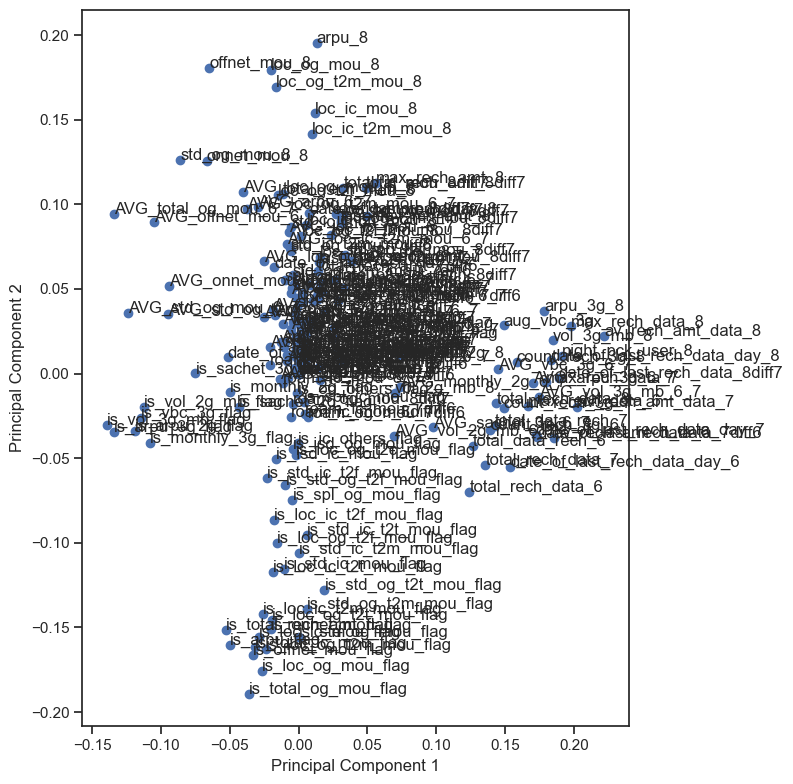

In [90]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [91]:
pca.explained_variance_ratio_


array([7.09605860e-02, 5.40967157e-02, 3.83028357e-02, 2.92368092e-02,
       2.63100900e-02, 2.22688421e-02, 2.13618421e-02, 1.93640020e-02,
       1.71809191e-02, 1.62407389e-02, 1.57876164e-02, 1.51407021e-02,
       1.47125045e-02, 1.41379219e-02, 1.37198367e-02, 1.32373415e-02,
       1.31351176e-02, 1.28097271e-02, 1.20140109e-02, 1.15802174e-02,
       1.12338904e-02, 1.11052635e-02, 1.07154089e-02, 1.05264554e-02,
       1.03150263e-02, 1.02216469e-02, 9.90267467e-03, 9.70995350e-03,
       9.27201492e-03, 9.17922281e-03, 9.05518671e-03, 8.90935900e-03,
       8.77652410e-03, 8.39741837e-03, 8.24169925e-03, 8.15956658e-03,
       8.08224793e-03, 7.76912568e-03, 7.74922338e-03, 7.57936575e-03,
       7.51410826e-03, 7.42734910e-03, 7.30008901e-03, 7.12691541e-03,
       7.03552123e-03, 6.87132657e-03, 6.71660191e-03, 6.65426608e-03,
       6.48557039e-03, 6.34539354e-03, 6.30233834e-03, 6.16220415e-03,
       6.06785044e-03, 6.00725090e-03, 5.87140000e-03, 5.81964202e-03,
      

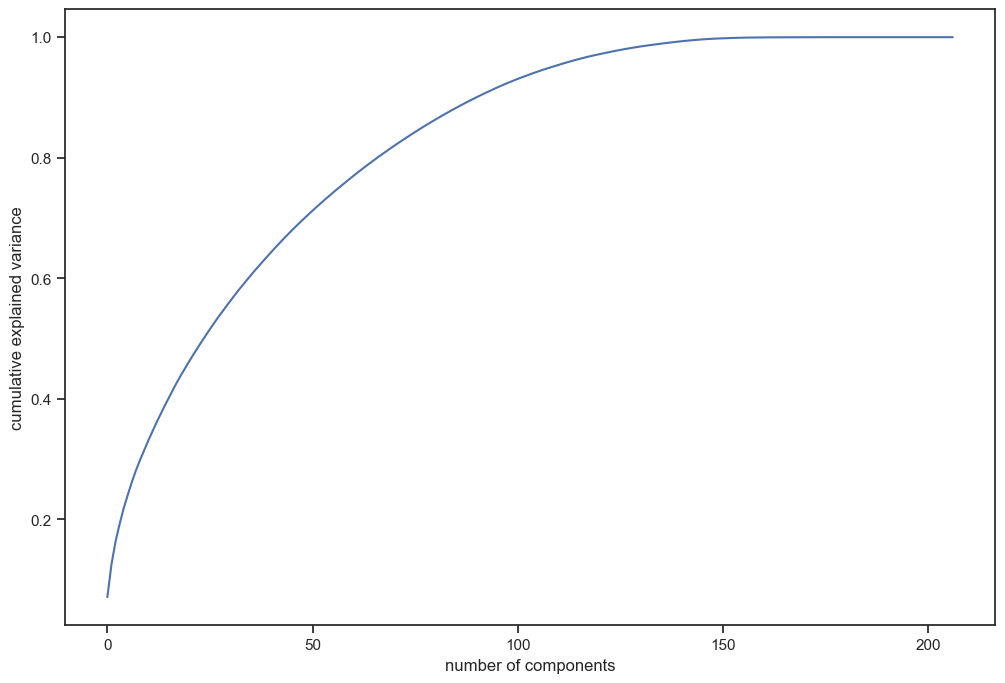

In [92]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [93]:
print (pca.explained_variance_ratio_.cumsum())


[0.07096059 0.1250573  0.16336014 0.19259695 0.21890704 0.24117588
 0.26253772 0.28190172 0.29908264 0.31532338 0.331111   0.3462517
 0.3609642  0.37510213 0.38882196 0.4020593  0.41519442 0.42800415
 0.44001816 0.45159838 0.46283227 0.47393753 0.48465294 0.49517939
 0.50549442 0.51571607 0.52561874 0.5353287  0.54460071 0.55377993
 0.56283512 0.57174448 0.580521   0.58891842 0.59716012 0.60531969
 0.61340194 0.62117106 0.62892028 0.63649965 0.64401376 0.65144111
 0.6587412  0.66586811 0.67290363 0.67977496 0.68649156 0.69314583
 0.6996314  0.70597679 0.71227913 0.71844133 0.72450919 0.73051644
 0.73638784 0.74220748 0.74795148 0.75359786 0.75916612 0.76469546
 0.77017034 0.77553008 0.78082583 0.78604069 0.79115037 0.79624563
 0.80119064 0.80603475 0.81084405 0.81561786 0.82031889 0.82492267
 0.8294798  0.83401459 0.83839583 0.84274654 0.84708019 0.85136305
 0.85550379 0.85959266 0.8636118  0.86760286 0.87151341 0.87533508
 0.87913447 0.88282651 0.88651064 0.89010111 0.89360925 0.89705

In [94]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=55)

In [95]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(23962, 55)

In [97]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0


max corr: 0.03778567561416092 , min corr:  -0.03618982087463898


In [98]:
#Applying selected components to the test data
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(5991, 55)

# Logistic Regression

In [101]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)


In [102]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.89'

In [106]:
def plotActualVsPredicted(actual, predicted,title_str):
    df_dict = {'actual': list (actual), 'pred': list(predicted)}
    df = pd.DataFrame(df_dict)
    pred_ranks = pd.qcut(df['pred'].rank(method='first'), 100, labels=False)
    actual_ranks = pd.qcut(df['actual'].rank(method='first'), 100, labels=False)
    pred_percentiles = df.groupby(pred_ranks).mean()
    actual_percentiles = df.groupby(actual_ranks).mean()
    plt.title(title_str)
    plt.plot(np.arange(.01, 1.01, .01), np.array(pred_percentiles['pred']),
             color='darkorange', lw=2, label='Prediction')
    plt.plot(np.arange(.01, 1.01, .01), np.array(pred_percentiles['actual']),
             color='navy', lw=2, linestyle='--', label='Actual')
    plt.ylabel('Target Percentile')
    plt.xlabel('Population Percentile')
    plt.xlim([0.0, 1.0])
    plt.ylim([-0.05, 1.05])
    from pylab import rcParams
    rcParams['figure.figsize'] = 10, 4

    plt.legend(loc="best")
    plt.show()

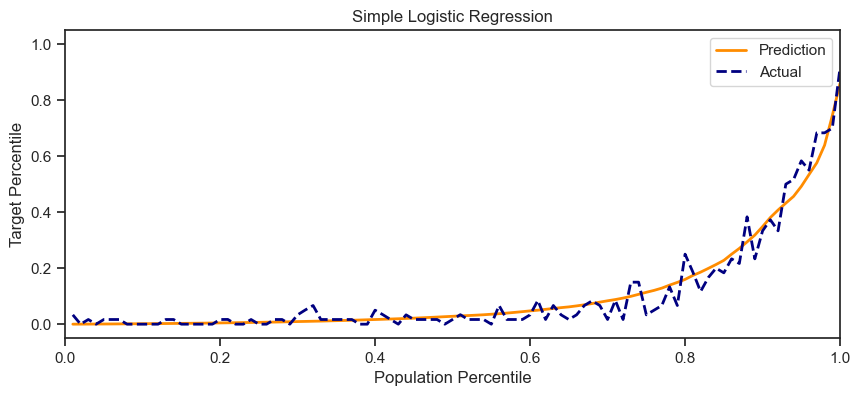

In [107]:
plotActualVsPredicted(y_test.values,pred_probs_test,"Simple Logistic Regression")


In here we used 55 components, which could nearly explain 85% variance in dataset

We were able to achieve 89% Area under the curve on the test set

2. Let's build couple of more models with different number of components. Let's see if the results changes



In [108]:
pca_last1 = PCA(n_components=48)
df_train_pca1 = pca_last1.fit_transform(X_train)
df_test_pca1 = pca_last1.transform(X_test)
df_test_pca1.shape

(5991, 48)

In [109]:
#training the regression model
learner_pca1 = LogisticRegression()
model_pca1 = learner_pca1.fit(df_train_pca1,y_train)
#Making prediction on the test data
pred_probs_test1 = model_pca1.predict_proba(df_test_pca1)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test1))


'0.89'

In [110]:
pca_last2 = PCA(n_components=15)
df_train_pca2 = pca_last2.fit_transform(X_train)
df_test_pca2 = pca_last2.transform(X_test)
df_test_pca2.shape

(5991, 15)

In [111]:
#training the regression model
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)
#Making prediction on the test data
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.89'

## Logistic Regression - with penalty


In [115]:
from sklearn.feature_selection import RFE

logmodel_CW_dict = LogisticRegression(class_weight='balanced',penalty='l2',random_state=9999,solver='newton-cg',C=10000000,n_jobs=-1)
logmodel_CW_dict.fit(df_train_pca,y_train)

LogisticRegression(C=10000000, class_weight='balanced', n_jobs=-1,
                   random_state=9999, solver='newton-cg')

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      5363
           1       0.34      0.84      0.49       628

    accuracy                           0.81      5991
   macro avg       0.66      0.83      0.69      5991
weighted avg       0.91      0.81      0.84      5991

Accuracy for the test dataset 81.3%
ROC for the test dataset 82.5%


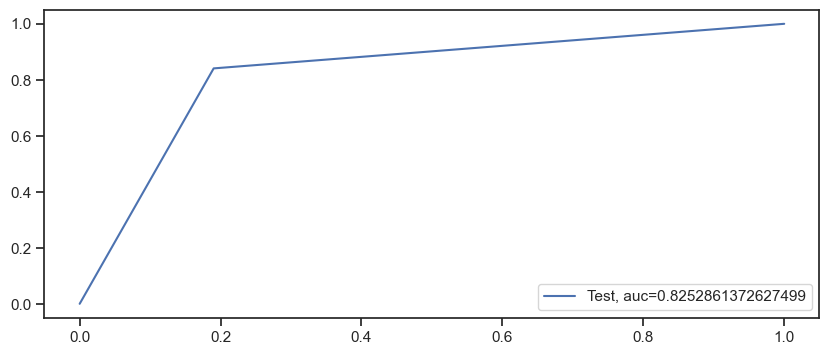

In [116]:
predictions = logmodel_CW_dict.predict(df_test_pca)
prediction_probs = logmodel_CW_dict.predict_proba(df_test_pca)[:,1]
print(classification_report(y_test, predictions))
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

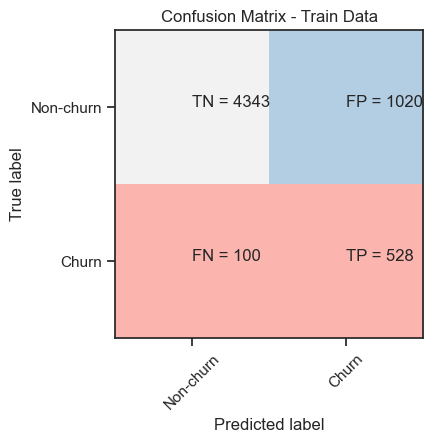

In [117]:
cm = confusion_matrix(y_test, predictions)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

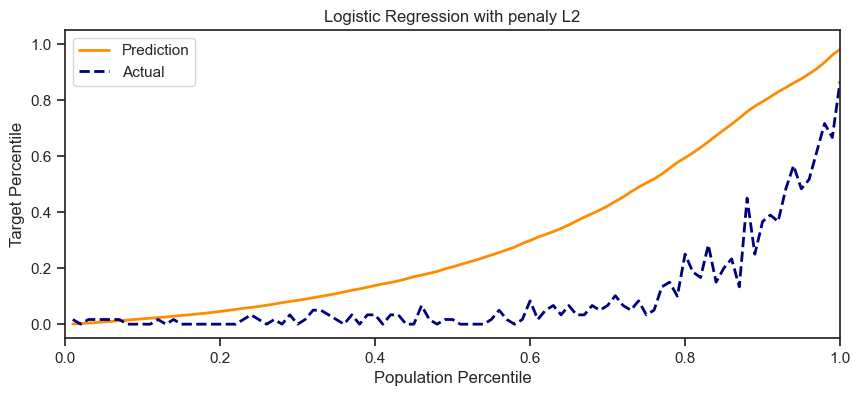

In [118]:
plotActualVsPredicted(y_test.values,prediction_probs,"Logistic Regression with penaly L2")


# Random Forest

In [120]:
from sklearn.ensemble import RandomForestClassifier
RFC_balanced = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None,
                                      min_samples_split=500, min_samples_leaf=1, 
                                      min_weight_fraction_leaf=0.0, max_features='auto', 
                                      max_leaf_nodes=None,
                                      bootstrap=True, oob_score=False, n_jobs=-1, 
                                      random_state=9999, verbose=0, warm_start=False, 
                                      class_weight="balanced_subsample")

In [121]:
TrainedRFC= RFC_balanced.fit(df_train_pca,y_train)


              precision    recall  f1-score   support

           0       0.97      0.87      0.92      5363
           1       0.40      0.74      0.52       628

    accuracy                           0.86      5991
   macro avg       0.69      0.81      0.72      5991
weighted avg       0.91      0.86      0.88      5991

Accuracy for the test dataset 85.8%
ROC for the test dataset 87.6%


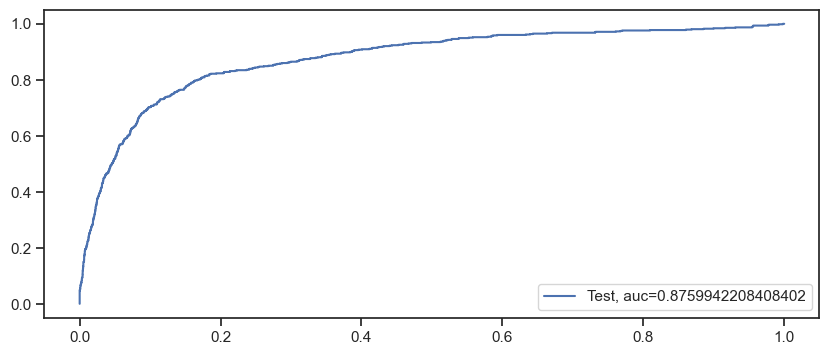

In [122]:
preds_RFC=TrainedRFC.predict(df_test_pca)
preds_probs_RFC=TrainedRFC.predict_proba(df_test_pca)[:,1]

print(classification_report(y_test, preds_RFC))
accuracy = metrics.accuracy_score(y_test, preds_RFC)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_RFC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

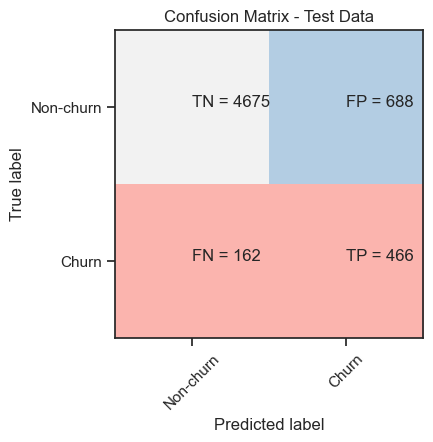

In [123]:
cm = confusion_matrix(y_test, preds_RFC)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()


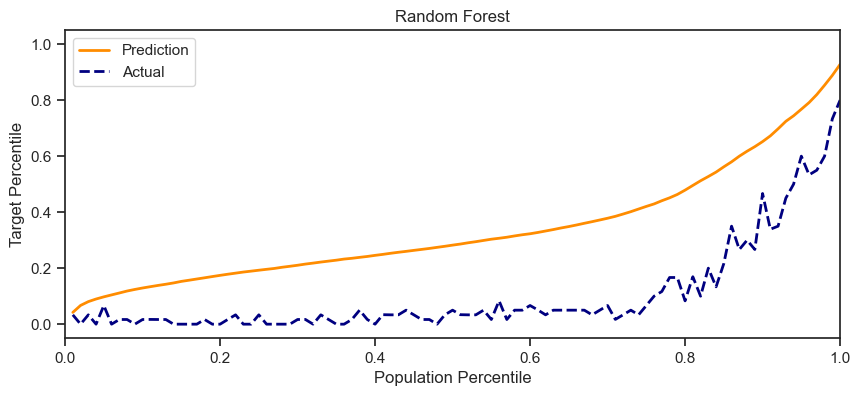

In [124]:
plotActualVsPredicted(y_test.values,preds_probs_RFC,"Random Forest")


# Gradient boosting

In [125]:
from sklearn import ensemble

# Fit classifier with out-of-bag estimates
params = {'n_estimators': 200, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 10, 'random_state': 9999}
GBC = ensemble.GradientBoostingClassifier(**params)

In [126]:
GBC.fit(df_train_pca,y_train)


GradientBoostingClassifier(learning_rate=0.01, min_samples_leaf=10,
                           n_estimators=200, random_state=9999, subsample=0.5)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      5363
           1       0.70      0.32      0.44       628

    accuracy                           0.91      5991
   macro avg       0.81      0.65      0.70      5991
weighted avg       0.90      0.91      0.90      5991

Accuracy for the test dataset 91.4%
ROC for the test dataset 88.8%


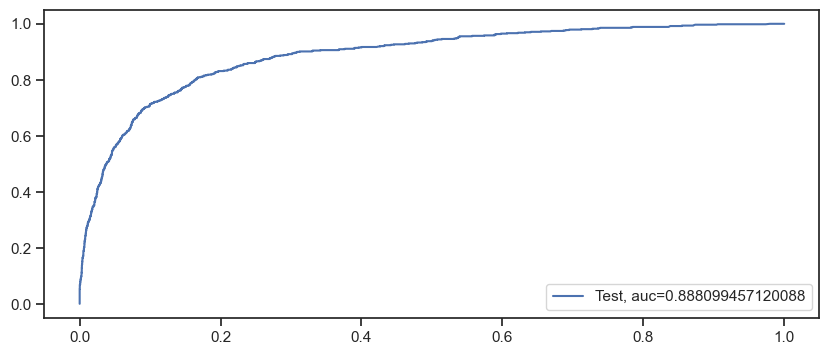

In [127]:
preds_GBC = GBC.predict(df_test_pca)
preds_probs_GBC = GBC.predict_proba(df_test_pca)[:,1]

print(classification_report(y_test, preds_GBC))
accuracy = metrics.accuracy_score(y_test, preds_GBC)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy))

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_GBC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

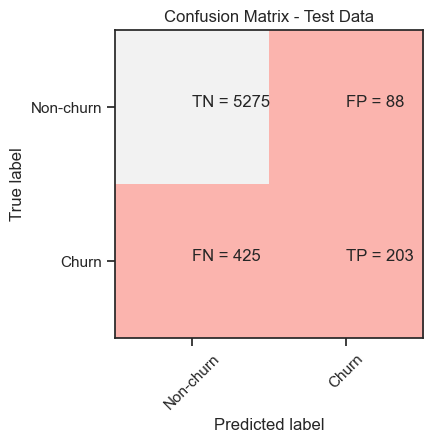

In [128]:
cm = confusion_matrix(y_test, preds_GBC)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

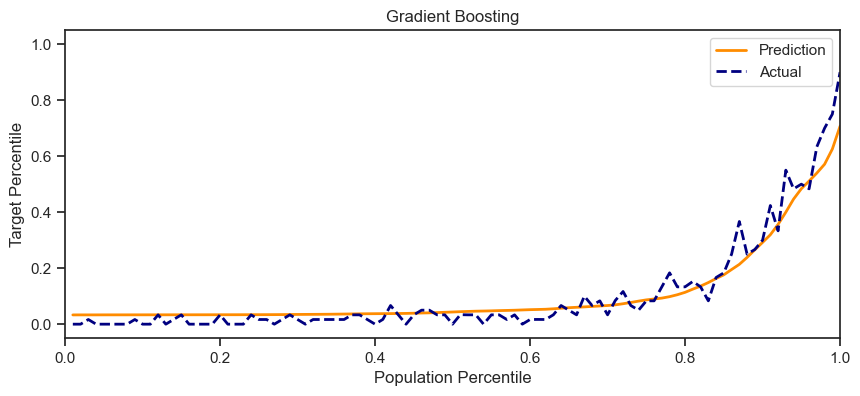

In [129]:
plotActualVsPredicted(y_test.values,preds_probs_GBC,"Gradient Boosting")


# Gradient Boosting with Hyperparameter tuning


In [131]:
from sklearn.model_selection import GridSearchCV   #Perforing grid search

# Fit classifier with out-of-bag estimates
param_test = {'n_estimators':range(200,500,100), 'max_depth':range(5,8,1)}

gsearch1 = GridSearchCV(
    estimator = ensemble.GradientBoostingClassifier(
        learning_rate=0.05,
        min_samples_split=20,
        min_samples_leaf=10,
        subsample=0.1,
        random_state=9999,verbose = 2,), param_grid = param_test, scoring='roc_auc',n_jobs=-1, cv=None,verbose=2)

In [132]:
gsearch1.fit(df_train_pca,y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.6239           0.0284            7.55s
         2           0.6175           0.0241            9.00s
         3           0.6089           0.0203            9.60s
         4           0.5887           0.0171            9.01s
         5           0.5288           0.0136            9.21s
         6           0.5380           0.0121            9.05s
         7           0.5809           0.0113            8.92s
         8           0.5333           0.0100            8.99s
         9           0.5350           0.0080            8.75s
        10           0.5410           0.0069            8.56s
        11           0.5015           0.0071            8.42s
        12           0.4997           0.0076            8.41s
        13           0.5223           0.0050            8.39s
        14           0.4940           0.0061            8.37s
        1

         5           0.5676           0.0141            9.50s
         6           0.5508           0.0130            9.23s
         7           0.5319           0.0104            8.94s
         8           0.5565           0.0101            9.00s
         9           0.5409           0.0095            9.04s
        10           0.5362           0.0060            9.29s
        11           0.5159           0.0059            9.24s
        12           0.4722           0.0064            9.33s
        13           0.5088           0.0061            9.33s
        14           0.5097           0.0045            9.38s
        15           0.4567           0.0057            9.31s
        16           0.4558           0.0041            9.28s
        17           0.4938           0.0044            9.34s
        18           0.4637           0.0040            9.23s
        19           0.4898           0.0039            9.09s
        20           0.4706           0.0032            9.04s
        

        11           0.4882           0.0077            9.02s
        12           0.4835           0.0059            8.86s
        13           0.5097           0.0052            8.87s
        14           0.4703           0.0058            8.83s
        15           0.5002           0.0050            8.79s
        16           0.4457           0.0043            8.66s
        17           0.4634           0.0032            8.56s
        18           0.4580           0.0032            8.61s
        19           0.4549           0.0033            8.54s
        20           0.4648           0.0038            8.46s
        21           0.4711           0.0031            8.33s
        22           0.4519           0.0020            8.21s
        23           0.4728           0.0027            8.10s
        24           0.4456           0.0020            8.06s
        25           0.4486           0.0020            8.01s
        26           0.4537           0.0016            8.00s
        

        38           0.4493           0.0007           12.37s
        39           0.4531           0.0005           12.35s
        40           0.4309           0.0006           12.26s
        41           0.4047           0.0010           12.17s
        42           0.4481           0.0004           12.08s
        43           0.4468           0.0001           12.01s
        44           0.4159           0.0006           11.97s
        45           0.4353          -0.0000           11.88s
        46           0.3802           0.0004           11.82s
        47           0.4436           0.0002           11.77s
        48           0.4364           0.0008           11.68s
        49           0.3903           0.0004           11.63s
        50           0.4411          -0.0001           11.58s
        51           0.4219           0.0005           11.50s
        52           0.3972           0.0000           11.43s
        53           0.4260           0.0002           11.37s
        

        64           0.4201          -0.0002           10.92s
        65           0.4047           0.0000           10.89s
        66           0.4033          -0.0004           10.85s
        67           0.3700          -0.0001           10.81s
        68           0.4515           0.0000           10.77s
        69           0.4115           0.0002           10.71s
        70           0.4075           0.0000           10.65s
        71           0.3997           0.0003           10.59s
        72           0.3708           0.0004           10.56s
        73           0.3912          -0.0001           10.50s
        74           0.4046          -0.0001           10.47s
        75           0.3759           0.0001           10.40s
        76           0.3830           0.0002           10.35s
        77           0.3817           0.0001           10.37s
        78           0.4032          -0.0002           10.33s
        79           0.4041          -0.0001           10.29s
        

        61           0.4176           0.0003           14.99s
        62           0.3795           0.0000           14.96s
        63           0.4093           0.0002           14.93s
        64           0.4216          -0.0002           14.87s
        65           0.3863           0.0005           14.83s
        66           0.3707          -0.0003           14.80s
        67           0.4044          -0.0002           14.80s
        68           0.4241           0.0001           14.78s
        69           0.4039          -0.0002           14.73s
        70           0.3683           0.0004           14.71s
        71           0.4187          -0.0002           14.63s
        72           0.4052          -0.0002           14.61s
        73           0.3756           0.0000           14.54s
        74           0.3812          -0.0003           14.52s
        75           0.3707          -0.0003           14.50s
        76           0.4423          -0.0000           14.46s
        

        71           0.4046          -0.0002           14.97s
        72           0.3697           0.0000           14.90s
        73           0.3916           0.0000           14.88s
        74           0.4027           0.0001           14.80s
        75           0.4003          -0.0002           14.74s
        76           0.4040          -0.0001           14.67s
        77           0.3779           0.0002           14.60s
        78           0.4042          -0.0002           14.55s
        79           0.4260          -0.0001           14.51s
        80           0.4054          -0.0004           14.44s
        81           0.4218          -0.0000           14.40s
        82           0.3932          -0.0002           14.36s
        83           0.3749          -0.0000           14.31s
        84           0.3813          -0.0001           14.28s
        85           0.4142          -0.0001           14.30s
        86           0.3969          -0.0003           14.23s
        

        69           0.4173          -0.0002           15.28s
        70           0.3774           0.0001           15.25s
        71           0.3920          -0.0003           15.17s
        72           0.3797          -0.0002           15.12s
        73           0.3902           0.0001           15.07s
        74           0.3880          -0.0002           15.02s
        75           0.3971           0.0002           14.97s
        76           0.3892           0.0001           14.92s
        77           0.3741           0.0002           14.85s
        78           0.3955          -0.0002           14.81s
        79           0.4052           0.0001           14.78s
        80           0.4009          -0.0001           14.70s
        81           0.3976          -0.0001           14.62s
        82           0.3686          -0.0002           14.54s
        83           0.3556          -0.0005           14.52s
        84           0.3815           0.0005           14.47s
        

       266           0.3535          -0.0003            1.54s
       267           0.3237           0.0000            1.49s
       268           0.3265          -0.0001            1.45s
       269           0.3091          -0.0003            1.40s
       270           0.3361          -0.0002            1.36s
       271           0.3376          -0.0003            1.31s
       272           0.3276          -0.0003            1.27s
       273           0.3372          -0.0003            1.22s
       274           0.3239          -0.0001            1.18s
       275           0.3123          -0.0002            1.13s
       276           0.3365          -0.0001            1.09s
       277           0.3401          -0.0004            1.04s
       278           0.3667          -0.0006            0.99s
       279           0.3300           0.0000            0.95s
       280           0.3423          -0.0006            0.90s
       281           0.3272          -0.0001            0.86s
       2

        20           0.4769           0.0036           13.30s
        21           0.4505           0.0029           13.29s
       264           0.3002          -0.0003            1.66s
       265           0.3056          -0.0002            1.61s
       266           0.3442          -0.0005            1.56s
       267           0.3037          -0.0004            1.52s
       268           0.3320           0.0000            1.47s
       269           0.2845          -0.0004            1.42s
       270           0.3177          -0.0001            1.38s
       271           0.3343          -0.0000            1.33s
       272           0.3335          -0.0002            1.29s
       273           0.3212          -0.0000            1.24s
       274           0.3452           0.0001            1.19s
       275           0.3113          -0.0000            1.15s
       276           0.3257          -0.0001            1.10s
       277           0.3525          -0.0002            1.06s
       2

       325           0.3318          -0.0001            3.42s
       326           0.3469          -0.0002            3.37s
       327           0.3205          -0.0003            3.32s
       328           0.3272          -0.0003            3.28s
       329           0.3123          -0.0002            3.23s
       330           0.2969          -0.0003            3.19s
       331           0.3126          -0.0002            3.14s
       332           0.3146          -0.0002            3.09s
       333           0.3147          -0.0002            3.05s
       334           0.3239          -0.0003            3.00s
       335           0.2942          -0.0001            2.96s
       336           0.3002          -0.0000            2.91s
       337           0.3250          -0.0003            2.86s
       338           0.3023          -0.0001            2.82s
       339           0.2987          -0.0002            2.77s
       340           0.3108          -0.0002            2.73s
       3

       335           0.2809          -0.0002            2.97s
       336           0.3111          -0.0000            2.92s
       337           0.3341          -0.0001            2.88s
       338           0.3189           0.0000            2.83s
       339           0.2939          -0.0002            2.78s
       340           0.2991          -0.0002            2.74s
       341           0.3008          -0.0002            2.69s
       342           0.3004          -0.0002            2.64s
       343           0.3102          -0.0002            2.60s
       344           0.2876          -0.0003            2.55s
       345           0.3012          -0.0003            2.50s
       346           0.2938           0.0000            2.46s
       347           0.3125          -0.0002            2.41s
       348           0.2741          -0.0002            2.37s
       349           0.2613          -0.0004            2.32s
       350           0.3469          -0.0002            2.28s
       3

       132           0.3343          -0.0001           15.19s
       133           0.3510          -0.0002           15.13s
       134           0.3568           0.0000           15.07s
       135           0.3364          -0.0001           15.01s
       136           0.3668          -0.0002           14.93s
       137           0.3240          -0.0003           14.86s
       138           0.3481          -0.0002           14.79s
       139           0.3286          -0.0004           14.73s
       140           0.3488          -0.0003           14.67s
       141           0.3423           0.0000           14.62s
       142           0.3480          -0.0002           14.56s
       143           0.3480           0.0002           14.48s
       144           0.3500           0.0001           14.43s
       145           0.3457          -0.0004           14.38s
       146           0.3964          -0.0001           14.32s
       147           0.3386          -0.0003           14.25s
       1

       235           0.3143          -0.0004            3.64s
       236           0.3379           0.0001            3.58s
       237           0.3041          -0.0005            3.52s
       238           0.2839          -0.0002            3.47s
       239           0.3279           0.0001            3.41s
       240           0.3023          -0.0002            3.36s
       241           0.2906          -0.0003            3.30s
       242           0.3008          -0.0006            3.24s
       243           0.3019          -0.0004            3.19s
       244           0.2842          -0.0004            3.13s
       245           0.3281          -0.0003            3.07s
       246           0.3090          -0.0002            3.02s
       247           0.3035          -0.0004            2.96s
       248           0.3095          -0.0003            2.91s
       249           0.3241          -0.0001            2.85s
       250           0.3170           0.0000            2.80s
       2

       118           0.3577          -0.0001            9.83s
       119           0.3590          -0.0001            9.77s
       120           0.3575          -0.0009            9.71s
       121           0.3959          -0.0001            9.65s
       122           0.3663          -0.0001            9.60s
       123           0.3486          -0.0003            9.54s
       124           0.3535          -0.0001            9.48s
       125           0.3472           0.0001            9.43s
       126           0.3692          -0.0000            9.39s
       127           0.3441          -0.0004            9.32s
       128           0.3460          -0.0002            9.26s
       129           0.3798          -0.0001            9.19s
       130           0.3420          -0.0003            9.13s
       131           0.3610           0.0002            9.07s
       132           0.3345          -0.0002            9.01s
       133           0.3546          -0.0000            8.96s
       1

       186           0.3056          -0.0002           11.42s
       187           0.3175          -0.0003           11.35s
       188           0.3460          -0.0000           11.30s
       189           0.2939          -0.0004           11.24s
       190           0.3156          -0.0002           11.18s
       191           0.3347          -0.0004           11.13s
       192           0.3144          -0.0001           11.06s
       193           0.3204           0.0000           11.01s
       194           0.3346           0.0000           10.95s
       195           0.2819          -0.0005           10.92s
       196           0.2872           0.0001           10.87s
       197           0.3110          -0.0001           10.83s
       198           0.3314           0.0002           10.77s
       199           0.3221          -0.0004           10.73s
       200           0.3016          -0.0000           10.68s
       201           0.3339          -0.0003           10.62s
       2

       196           0.3087          -0.0003           10.92s
       197           0.3060          -0.0002           10.86s
       198           0.3203           0.0000           10.81s
       199           0.2864          -0.0006           10.75s
       200           0.3018          -0.0002           10.69s
       201           0.3166          -0.0001           10.65s
       202           0.2965          -0.0003           10.59s
       203           0.3175          -0.0002           10.54s
       204           0.3256          -0.0001           10.48s
       205           0.3132          -0.0004           10.43s
       206           0.3263          -0.0003           10.40s
       207           0.3032          -0.0001           10.34s
       208           0.2962          -0.0002           10.28s
       209           0.3165          -0.0000           10.24s
       210           0.3108          -0.0001           10.20s
       211           0.3128          -0.0007           10.15s
       2

       191           0.3318           0.0002           11.30s
       192           0.3157          -0.0007           11.25s
       193           0.3477          -0.0004           11.19s
       194           0.3142          -0.0003           11.13s
       195           0.3015          -0.0004           11.08s
       196           0.3279           0.0002           11.03s
       197           0.3575          -0.0000           10.97s
       198           0.3381          -0.0000           10.91s
       199           0.2890          -0.0005           10.86s
       200           0.3424          -0.0004           10.81s
       201           0.3112          -0.0004           10.75s
       202           0.3166          -0.0005           10.70s
       203           0.3326          -0.0000           10.64s
       204           0.3256          -0.0003           10.58s
       205           0.3129          -0.0001           10.53s
       206           0.3218          -0.0003           10.47s
       2

       385           0.2651          -0.0005            0.82s
       386           0.2951          -0.0002            0.76s
       387           0.2670          -0.0002            0.71s
       388           0.2538          -0.0004            0.65s
       389           0.2369          -0.0003            0.60s
       390           0.2677          -0.0004            0.54s
       391           0.2624          -0.0004            0.49s
       392           0.2667          -0.0001            0.44s
       393           0.2509          -0.0003            0.38s
       394           0.2598          -0.0001            0.33s
       395           0.2814          -0.0001            0.27s
       396           0.2695          -0.0002            0.22s
       397           0.2431          -0.0001            0.16s
       398           0.2486           0.0000            0.11s
       399           0.2562          -0.0003            0.05s
       400           0.2834          -0.0001            0.00s
[CV] END

       267           0.2734          -0.0001            7.30s
       268           0.2861          -0.0001            7.24s
       269           0.2749          -0.0004            7.18s
       270           0.2989          -0.0004            7.13s
       271           0.2817          -0.0002            7.08s
       272           0.2789          -0.0003            7.02s
       273           0.3036          -0.0002            6.97s
       274           0.2869          -0.0004            6.91s
       275           0.2648          -0.0005            6.85s
       276           0.3088          -0.0002            6.79s
       277           0.3207          -0.0004            6.73s
       278           0.3244          -0.0002            6.67s
       279           0.2984          -0.0005            6.61s
       280           0.3014          -0.0002            6.56s
       281           0.2732          -0.0001            6.50s
       282           0.3016          -0.0004            6.45s
       2

       390           0.2538          -0.0006            0.57s
       391           0.2267          -0.0004            0.51s
       392           0.2593           0.0000            0.46s
       393           0.2568          -0.0001            0.40s
       394           0.2724          -0.0001            0.34s
       395           0.2517          -0.0001            0.28s
       396           0.2711          -0.0003            0.23s
       397           0.2508          -0.0003            0.17s
       398           0.2370           0.0001            0.11s
       399           0.2780          -0.0001            0.06s
       400           0.2654          -0.0001            0.00s
[CV] END ......................max_depth=6, n_estimators=400; total time=  22.8s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5896           0.0316           17.56s
         2           0.6203           0.0254           19.71s
         3           0.6020           0.0201      

       287           0.2808          -0.0002            0.71s
       288           0.3008           0.0000            0.65s
       289           0.2889          -0.0003            0.60s
       290           0.2929          -0.0001            0.54s
       291           0.3002          -0.0001            0.49s
       292           0.2743          -0.0001            0.44s
       293           0.3242          -0.0003            0.38s
       294           0.3127          -0.0001            0.33s
       295           0.2786          -0.0005            0.27s
       296           0.2780          -0.0000            0.22s
       297           0.2898          -0.0000            0.16s
       298           0.2992          -0.0004            0.11s
       299           0.2641          -0.0005            0.05s
       300           0.2970          -0.0003            0.00s
[CV] END ......................max_depth=6, n_estimators=300; total time=  16.4s
      Iter       Train Loss      OOB Improve   Rema

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.6239           0.0295           11.53s
         2           0.6379           0.0219           10.45s
         3           0.6217           0.0203           10.05s
         4           0.6098           0.0157            9.83s
         5           0.5412           0.0138            9.65s
         6           0.5760           0.0134            9.52s
         7           0.5623           0.0104            9.42s
         8           0.5241           0.0093            9.32s
         9           0.5505           0.0094            9.22s
        10           0.5227           0.0077            9.15s
        11           0.5264           0.0068            9.09s
        12           0.5186           0.0067            9.02s
        13           0.4859           0.0059            8.98s
        14           0.5092           0.0056            8.93s
        15           0.5351           0.0046            8.88s
       

       134           0.3771          -0.0001            3.18s
       135           0.3558          -0.0001            3.13s
       136           0.3932           0.0000            3.08s
       137           0.4120          -0.0002            3.03s
       138           0.3797          -0.0001            2.98s
       139           0.3758           0.0002            2.94s
       140           0.3773           0.0001            2.89s
       141           0.3773          -0.0002            2.84s
       142           0.3834           0.0000            2.79s
       143           0.3798           0.0002            2.74s
       144           0.3831          -0.0002            2.70s
       145           0.3695           0.0000            2.65s
       146           0.3713          -0.0000            2.60s
       147           0.3619          -0.0000            2.55s
       148           0.4194          -0.0004            2.50s
       149           0.3863          -0.0004            2.46s
       1

GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.05,
                                                  min_samples_leaf=10,
                                                  min_samples_split=20,
                                                  random_state=9999,
                                                  subsample=0.1, verbose=2),
             n_jobs=-1,
             param_grid={'max_depth': range(5, 8),
                         'n_estimators': range(200, 500, 100)},
             scoring='roc_auc', verbose=2)

In [133]:
gsearch1.best_params_, gsearch1.best_score_


({'max_depth': 5, 'n_estimators': 200}, 0.8888653923993666)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5363
           1       0.64      0.42      0.51       628

    accuracy                           0.91      5991
   macro avg       0.79      0.70      0.73      5991
weighted avg       0.90      0.91      0.91      5991

Accuracy for the test dataset 91.4%
ROC for the test dataset 89.7%


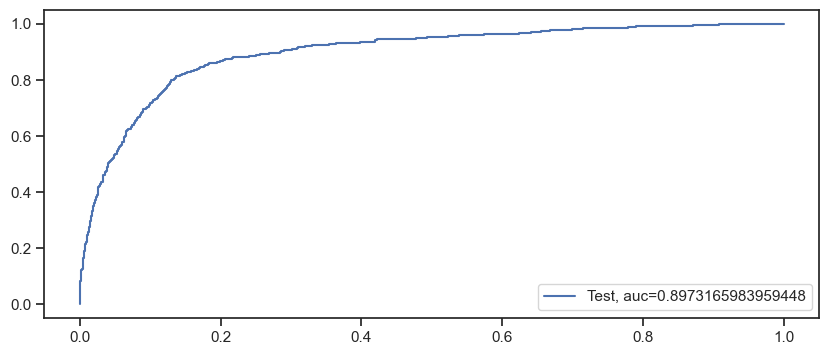

In [134]:
preds_GBC_HT = gsearch1.predict(df_test_pca)
preds_GBC_probs_HT = gsearch1.predict_proba(df_test_pca)[:,1]

print(classification_report(y_test, preds_GBC_HT))
accuracy = metrics.accuracy_score(y_test, preds_GBC_HT)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_GBC_probs_HT)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

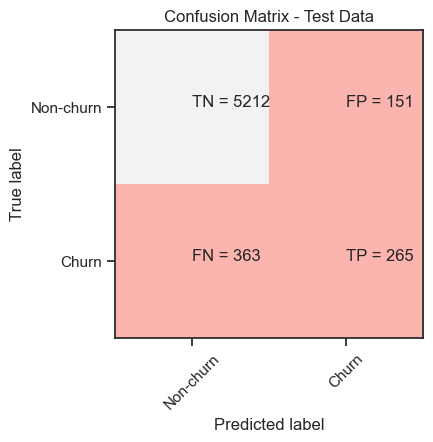

In [135]:
cm = confusion_matrix(y_test, preds_GBC_HT)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

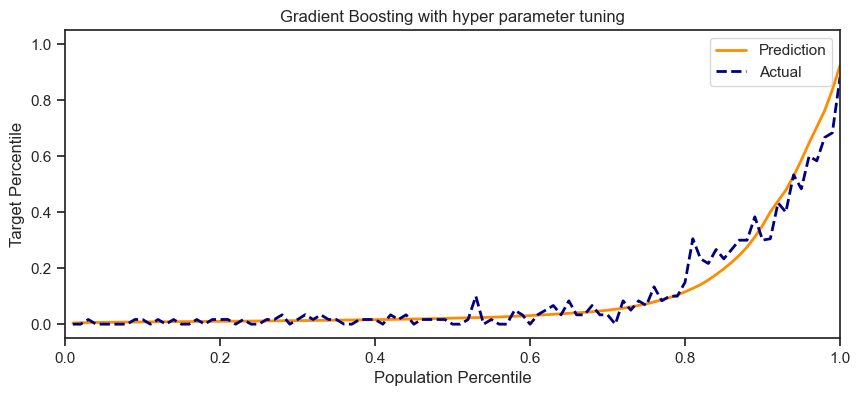

In [136]:
plotActualVsPredicted(y_test.values,preds_GBC_probs_HT,"Gradient Boosting with hyper parameter tuning")


## GridSearchCV

In [138]:
param_test = {'min_samples_leaf': range(10,100,20)}

gsearch1 = GridSearchCV(
    estimator = ensemble.GradientBoostingClassifier(
        n_estimators = 100,
        learning_rate=0.05,
        max_depth = 5,
        min_samples_split=100,
        subsample=0.1,
        random_state=9999,verbose = 2,), param_grid = param_test, scoring='roc_auc',n_jobs=-1, cv=None,verbose=2)
gsearch1.fit(df_train_pca,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
        44           0.3820           0.0011           21.59s
        45           0.4145           0.0000           21.50s
        46           0.3713           0.0004           21.43s
        47           0.4015           0.0003           21.30s
        48           0.4107           0.0002           21.21s
        49           0.3716           0.0002           21.14s
        50           0.4097          -0.0000           21.07s
        51           0.3839           0.0004           21.00s
        52           0.3872           0.0000           20.94s
        53           0.3590           0.0001           20.84s
        54           0.3675          -0.0000           20.89s
        55           0.4357          -0.0002           20.75s
        56           0.3711           0.0004           20.69s
        57           0.3651          -0.0000           20.67s
        58           0.3885           0.0004           20.55s
        59

        54           0.3742           0.0006           21.20s
        55           0.4379          -0.0000           21.07s
        56           0.3770          -0.0003           21.04s
        57           0.3631           0.0000           20.92s
        58           0.3833           0.0001           20.86s
        59           0.3702           0.0004           20.74s
        60           0.3878          -0.0000           20.69s
        61           0.3923          -0.0001           20.61s
        62           0.3485          -0.0001           20.51s
        63           0.3867           0.0003           20.44s
        64           0.3919           0.0000           20.42s
        65           0.3509          -0.0002           20.31s
        66           0.3481          -0.0002           20.27s
        67           0.3752          -0.0002           20.19s
        68           0.3978           0.0000           20.13s
        69           0.3730          -0.0004           20.05s
        

       162           0.3031          -0.0002            8.53s
       163           0.3430          -0.0003            8.47s
       164           0.3106          -0.0002            8.41s
       165           0.3164          -0.0002            8.34s
       166           0.3040          -0.0001            8.28s
       167           0.3240          -0.0005            8.21s
       168           0.2901          -0.0005            8.15s
       169           0.3012          -0.0004            8.09s
       170           0.3218          -0.0004            8.03s
       171           0.3268          -0.0003            7.99s
       172           0.3163          -0.0002            7.93s
       173           0.2995          -0.0002            7.87s
       174           0.3167          -0.0001            7.80s
       175           0.2907          -0.0003            7.74s
       176           0.3332          -0.0002            7.68s
       177           0.3196          -0.0007            7.62s
       1

       119           0.3545           0.0002           11.84s
       120           0.3410          -0.0003           11.74s
       121           0.3588          -0.0009           11.67s
       122           0.3497          -0.0007           11.59s
       123           0.3322          -0.0002           11.52s
       124           0.3731           0.0001           11.46s
       125           0.3315          -0.0001           11.40s
       126           0.3584           0.0000           11.33s
       127           0.3148          -0.0002           11.24s
       128           0.3412          -0.0004           11.16s
       129           0.3295           0.0000           11.10s
       130           0.3392          -0.0002           11.04s
       131           0.3348          -0.0005           11.03s
       132           0.3562           0.0001           10.97s
       133           0.3112          -0.0001           10.90s
       134           0.3333           0.0002           10.83s
       1

       308           0.2617           0.0000            5.42s
       309           0.2754          -0.0005            5.36s
       310           0.2639          -0.0004            5.29s
       311           0.2539          -0.0000            5.23s
       312           0.2578          -0.0001            5.17s
       313           0.2566          -0.0004            5.11s
       314           0.2139          -0.0002            5.05s
       315           0.2544          -0.0002            4.99s
       316           0.2492          -0.0003            4.93s
       317           0.2350          -0.0002            4.87s
       318           0.2357          -0.0003            4.80s
       319           0.2376          -0.0004            4.74s
       320           0.2375          -0.0003            4.68s
       321           0.2581          -0.0004            4.62s
       322           0.2342          -0.0003            4.56s
       323           0.2245          -0.0006            4.50s
       3

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.6334           0.0285            4.83s
         2           0.6513           0.0222            4.32s
         3           0.6349           0.0198            4.20s
         4           0.6178           0.0149            4.10s
         5           0.5562           0.0128            4.03s
         6           0.5874           0.0123            3.96s
         7           0.5793           0.0102            3.89s
         8           0.5412           0.0090            3.84s
         9           0.5669           0.0086            3.79s
        10           0.5403           0.0080            3.74s
        11           0.5444           0.0063            3.71s
        12           0.5411           0.0066            3.66s
        13           0.5016           0.0061            3.62s
        14           0.5317           0.0060            3.57s
        15           0.5520           0.0044            3.53s
       

GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.05,
                                                  max_depth=5,
                                                  min_samples_split=100,
                                                  random_state=9999,
                                                  subsample=0.1, verbose=2),
             n_jobs=-1, param_grid={'min_samples_leaf': range(10, 100, 20)},
             scoring='roc_auc', verbose=2)

In [139]:
gsearch1.best_params_, gsearch1.best_score_


({'min_samples_leaf': 90}, 0.8928694152043135)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      5363
           1       0.66      0.42      0.52       628

    accuracy                           0.92      5991
   macro avg       0.80      0.70      0.74      5991
weighted avg       0.91      0.92      0.91      5991

Accuracy for the test dataset 91.7%
ROC for the test dataset 89.8%


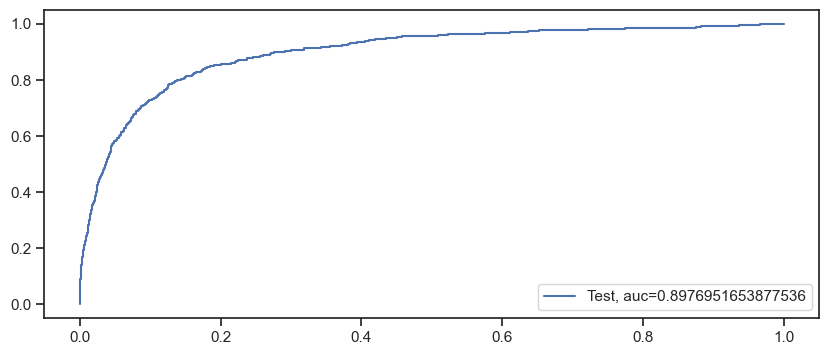

In [140]:
preds_GBC_HT = gsearch1.predict(df_test_pca)
preds_GBC_probs_HT = gsearch1.predict_proba(df_test_pca)[:,1]

print(classification_report(y_test, preds_GBC_HT))
accuracy = metrics.accuracy_score(y_test, preds_GBC_HT)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_GBC_probs_HT)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

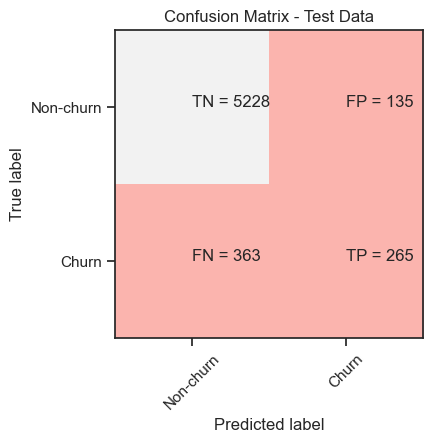

In [141]:
cm = confusion_matrix(y_test, preds_GBC_HT)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

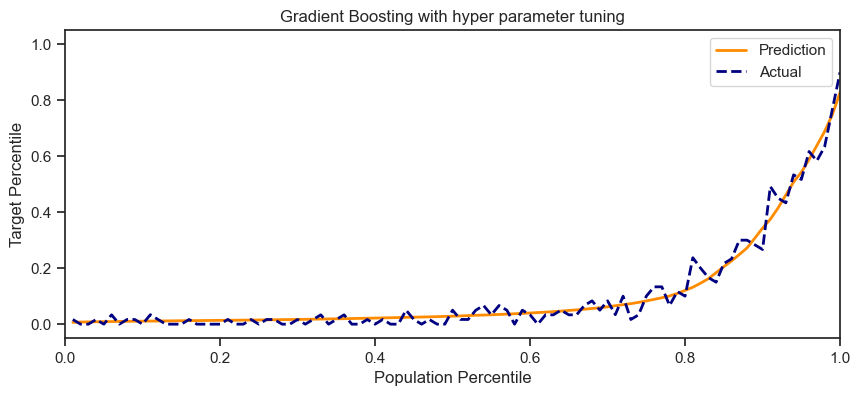

         8           0.5608           0.0110            3.97s
         9           0.5541           0.0090            3.94s
        10           0.5304           0.0080            3.83s
        11           0.5079           0.0065            3.79s
        12           0.4662           0.0055            3.71s
        13           0.5267           0.0053            3.71s
        14           0.5098           0.0043            3.63s
        15           0.4635           0.0041            3.58s
        16           0.4609           0.0041            3.58s
        17           0.4890           0.0047            3.51s
        18           0.4757           0.0038            3.48s
        19           0.5290           0.0040            3.41s
        20           0.4679           0.0033            3.41s
        21           0.5115           0.0034            3.35s
        22           0.4455           0.0023            3.30s
        23           0.4791           0.0025            3.29s
        

         8           0.5671           0.0102            3.74s
         9           0.5565           0.0090            3.68s
        10           0.5564           0.0067            3.68s
        11           0.5284           0.0057            3.59s
        12           0.4856           0.0061            3.61s
        13           0.5209           0.0067            3.53s
        14           0.5207           0.0052            3.54s
        15           0.4662           0.0053            3.47s
        16           0.4707           0.0048            3.40s
        17           0.5047           0.0042            3.34s
        18           0.4844           0.0039            3.28s
        19           0.5058           0.0040            3.25s
        20           0.4901           0.0034            3.22s
        21           0.5212           0.0031            3.16s
        22           0.4645           0.0030            3.13s
        23           0.4695           0.0031            3.10s
        

         8           0.5621           0.0114            3.99s
         9           0.5569           0.0087            3.92s
        10           0.5306           0.0072            3.82s
        11           0.5087           0.0066            3.86s
        12           0.4635           0.0057            3.76s
        13           0.5254           0.0054            3.76s
        14           0.5111           0.0049            3.68s
        15           0.4681           0.0047            3.65s
        16           0.4619           0.0039            3.67s
        17           0.4893           0.0039            3.59s
        18           0.4798           0.0040            3.54s
        19           0.5286           0.0037            3.47s
        20           0.4696           0.0032            3.43s
        21           0.5125           0.0038            3.38s
        22           0.4475           0.0033            3.34s
        23           0.4785           0.0030            3.28s
        

        66           0.4339           0.0003            1.43s
        67           0.3840           0.0002            1.39s
        68           0.4673           0.0003            1.35s
        69           0.4351          -0.0000            1.31s
        70           0.4202           0.0001            1.26s
        71           0.4225          -0.0002            1.22s
        72           0.3864           0.0001            1.18s
        73           0.4133           0.0000            1.14s
        74           0.4197           0.0004            1.09s
        75           0.3951          -0.0001            1.05s
        76           0.3984           0.0002            1.01s
        77           0.3937          -0.0001            0.97s
        78           0.4276          -0.0001            0.92s
        79           0.4226          -0.0003            0.88s
        80           0.4148          -0.0004            0.84s
        81           0.4166           0.0001            0.80s
        

In [143]:
plotActualVsPredicted(y_test.values,preds_GBC_probs_HT,"Gradient Boosting with hyper parameter tuning")


## Data Feature Importance through RFE and LR

In [84]:
processed_df = df.copy()

In [85]:
processed_df.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_8  onnet_mou_8  \
0              0.0             0.0             0.0   213.803         0.00   
7              0.0             0.0             0.0  3171.480        52.29   
8              0.0             0.0             0.0   137.362        35.08   
21             0.0             0.0             0.0   637.760        85.14   
23             0.0             0.0             0.0   366.966        33.58   

    offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  \
0           0.00           0.00           0.00              0.00   
7         325.91          31.64          38.06             40.28   
8         136.48           0.00           0.00             12.49   
21        983.39           0.00           0.00             23.34   
23        205.89           0.00           0.00             33.58   

    loc_og_t2m_mou_8  ...  vol_2g_mb_7diff6  vol_2g_mb_8diff7  \
0               0.00  ...            -28.81              4.43   
7             162.28  ...              0.00              0.00   
8              50.54  ...            356.00           -355.97   
21            104.81  ...              0.00              0.00   
23            148.56  ...              0.48             -0.47   

    vol_3g_mb_7diff6  vol_3g_mb_8diff7  vbc_3g_7diff6  vbc_3g_8diff7  \
0              67.19            -41.15        -101.20          30.40   
7               0.00              0.00           0.64          38.36   
8             750.95           -739.01         788.49        -889.62   
21              0.00              0.00           0.00           0.00   
23            599.09            410.83          51.86         -11.41   

    date_of_last_rech_7diff6  date_of_last_rech_8diff7  \
0                       25.0                      23.0   
7                       28.0                      32.0   
8                       36.0                      30.0   
21                      31.0                      31.0   
23                      19.0                      48.0   

    date_of_last_rech_data_7diff6  date_of_last_rech_data_8diff7  
0                            25.0                           23.0  
7                             0.0                            0.0  
8                             0.0                           23.0  
21                            0.0                            0.0  
23                            0.0                           30.0  

[5 rows x 206 columns]

In [86]:
from sklearn.model_selection import train_test_split
processed_df_train, processed_df_test =  train_test_split(processed_df, test_size=0.3, random_state=42)
processed_df_train.shape, processed_df_test.shape

((20967, 206), (8986, 206))

In [87]:
y = processed_df_train.pop('churn_flag')

In [88]:
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()
processed_df_train_scalled = scaller.fit_transform(processed_df_train)

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
lr = LogisticRegression(random_state=42)
rfe = RFE(estimator=lr, n_features_to_select=20)
rfe_model = rfe.fit(processed_df_train_scalled, y)

In [90]:
rfe_model.support_

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False,  True,  True, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [91]:
sorted_columns = [(_,column) for _, column in sorted(zip(rfe_model.ranking_, processed_df_train.columns))][:20]
sorted_columns

[(1, 'AVG_loc_ic_t2f_mou_6_7'),
 (1, 'AVG_roam_og_mou_6_7'),
 (1, 'AVG_spl_ic_mou_6_7'),
 (1, 'AVG_spl_og_mou_6_7'),
 (1, 'aug_vbc_3g'),
 (1, 'is_loc_og_t2m_mou_flag'),
 (1, 'last_day_rch_amt_8'),
 (1, 'loc_ic_mou_8'),
 (1, 'loc_ic_t2f_mou_7diff6'),
 (1, 'loc_ic_t2f_mou_8'),
 (1, 'loc_ic_t2f_mou_8diff7'),
 (1, 'og_others_8'),
 (1, 'roam_og_mou_8'),
 (1, 'spl_ic_mou_7diff6'),
 (1, 'spl_ic_mou_8'),
 (1, 'spl_ic_mou_8diff7'),
 (1, 'spl_og_mou_7diff6'),
 (1, 'spl_og_mou_8'),
 (1, 'spl_og_mou_8diff7'),
 (1, 'total_rech_num_8')]

In [92]:
processed_df_train_final =  processed_df_train[processed_df_train.columns[rfe_model.support_]]
print(processed_df_train_final.shape)
processed_df_train_final.head()

(20967, 20)


roam_og_mou_8  spl_og_mou_8  og_others_8  loc_ic_t2f_mou_8  \
49069            0.0          9.26          0.0              0.00   
90375            0.0          4.24          0.0              0.00   
80131            0.0          0.00          0.0              0.00   
36950            0.0          0.00          0.0              0.00   
22699            0.0          2.51          0.0              5.84   

       loc_ic_mou_8  spl_ic_mou_8  total_rech_num_8  last_day_rch_amt_8  \
49069         53.51          0.51                10                  50   
90375         49.16          0.00                72                  50   
80131        754.48          0.00                10                   0   
36950          0.00          0.00                 0                   0   
22699        218.81          0.00                 9                 130   

       aug_vbc_3g  AVG_roam_og_mou_6_7  is_loc_og_t2m_mou_flag  \
49069        0.00                  0.0                       0   
90375        0.00                  0.0                       1   
80131       22.14                  0.0                       1   
36950        0.00                  0.0                       1   
22699        0.00                  0.0                       0   

       AVG_spl_og_mou_6_7  AVG_loc_ic_t2f_mou_6_7  AVG_spl_ic_mou_6_7  \
49069              41.695                   1.005               0.105   
90375               0.100                   0.000               0.000   
80131               3.575                   0.000               0.000   
36950               0.000                  53.210               0.000   
22699               0.000                  20.130               0.075   

       spl_og_mou_7diff6  spl_og_mou_8diff7  loc_ic_t2f_mou_7diff6  \
49069              19.13             -42.00                  -2.01   
90375               0.20               4.04                   0.00   
80131               6.23              -6.69                   0.00   
36950               0.00               0.00                   0.00   
22699               0.00               2.51                 -35.10   

       spl_ic_mou_7diff6  loc_ic_t2f_mou_8diff7  spl_ic_mou_8diff7  
49069               0.21                   0.00                0.3  
90375               0.00                   0.00                0.0  
80131               0.00                   0.00                0.0  
36950               0.00                   0.00                0.0  
22699              -0.15                   3.26                0.0

In [93]:
lnr = LogisticRegression(random_state=42)
lnr.fit(processed_df_train_final, y)
y_test = processed_df_test.pop('churn_flag')
processed_df_test_scalled = scaller.transform(processed_df_test)
processed_df_test_final = processed_df_test[processed_df_train_final.columns]

In [94]:
processed_df_test_final.head()

roam_og_mou_8  spl_og_mou_8  og_others_8  loc_ic_t2f_mou_8  \
73764          87.49          2.58          0.0              3.61   
18280           0.00          0.00          0.0             11.93   
43793          13.31          0.00          0.0              0.00   
69530           0.00          0.00          0.0              8.06   
71555          60.09          4.46          0.0              1.51   

       loc_ic_mou_8  spl_ic_mou_8  total_rech_num_8  last_day_rch_amt_8  \
73764        118.63           0.0                 3                 250   
18280        604.96           0.0                15                 252   
43793          0.00           0.0                 8                  47   
69530         59.84           0.0                10                  17   
71555        360.58           0.0                15                  50   

       aug_vbc_3g  AVG_roam_og_mou_6_7  is_loc_og_t2m_mou_flag  \
73764      248.23                0.000                       1   
18280      884.31                0.000                       0   
43793        0.00                9.005                       1   
69530        0.00                0.000                       1   
71555      587.04                0.000                       0   

       AVG_spl_og_mou_6_7  AVG_loc_ic_t2f_mou_6_7  AVG_spl_ic_mou_6_7  \
73764               0.000                  35.625               0.075   
18280               5.605                  16.910               0.000   
43793               0.000                   0.000               0.000   
69530              18.755                  10.285               0.000   
71555              13.905                   1.570               0.000   

       spl_og_mou_7diff6  spl_og_mou_8diff7  loc_ic_t2f_mou_7diff6  \
73764               0.00               2.58                  37.43   
18280              11.21             -11.21                  14.26   
43793               0.00               0.00                   0.00   
69530              -1.79             -17.86                   1.09   
71555               8.01             -13.45                  -3.14   

       spl_ic_mou_7diff6  loc_ic_t2f_mou_8diff7  spl_ic_mou_8diff7  
73764              -0.15                 -50.73                0.0  
18280               0.00                 -12.11                0.0  
43793               0.00                   0.00                0.0  
69530               0.00                  -2.77                0.0  
71555               0.00                   1.51                0.0

<Axes: >

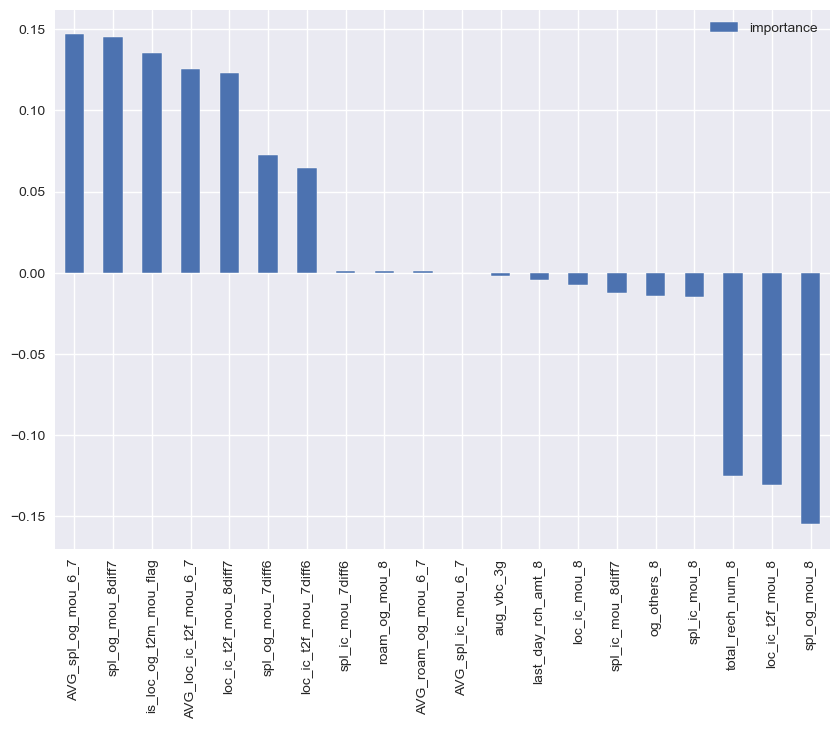

In [95]:

y_pred_prob = lnr.predict_proba(processed_df_test_final)[:,1]
feature_importance = pd.DataFrame((lnr.coef_), columns=processed_df_train_final.columns).T
feature_importance.columns = ['importance']
feature_importance.sort_values(by='importance', ascending=False, inplace=True)
feature_importance.plot(kind='bar', figsize=(10, 7))


In [96]:
y_train_pred = lnr.predict(processed_df_train_final)

In [105]:
y_test_pred = lnr.predict(processed_df_test_final)

In [102]:
processed_df_train['ch']

((20967, 205), (20967,))

Training report

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     18710
           1       0.78      0.24      0.37      2257

    accuracy                           0.91     20967
   macro avg       0.85      0.62      0.66     20967
weighted avg       0.90      0.91      0.89     20967



Testing Report

In [106]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7988
           1       0.82      0.25      0.38       998

    accuracy                           0.91      8986
   macro avg       0.87      0.62      0.67      8986
weighted avg       0.90      0.91      0.89      8986



In [70]:
from sklearn.metrics import roc_curve, roc_auc_score

In [71]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

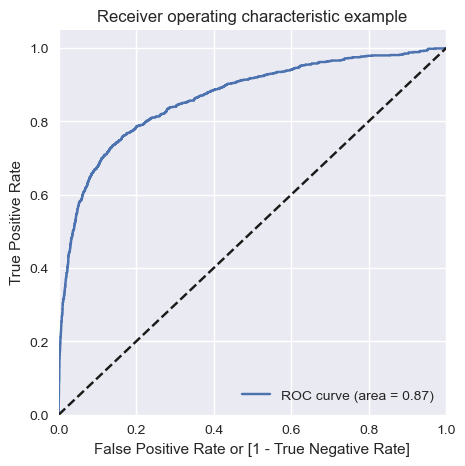

In [108]:
draw_roc(y_test, y_pred_prob)

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

Trainging scores

In [110]:
print('Accuracy:', accuracy_score(y, y_train_pred))
print('Precision:', precision_score(y, y_train_pred))
print('Recall:', recall_score(y, y_train_pred))
print('F1 Score:', f1_score(y, y_train_pred))

Accuracy: 0.9109553107263796
Precision: 0.7769886363636364
Recall: 0.24235711120957024
F1 Score: 0.3694697737250929


Testing Scores

In [109]:
print('Accuracy:', accuracy_score(y_test, y_test_pred))
print('Precision:', precision_score(y_test, y_test_pred))
print('Recall:', recall_score(y_test, y_test_pred))
print('F1 Score:', f1_score(y_test, y_test_pred))


Accuracy: 0.9104162029824171
Precision: 0.8184818481848185
Recall: 0.24849699398797595
F1 Score: 0.3812451960030746
